# Face recognition - Advanced Computer Vision

#### Objective

Goal is to build a face identification model to recognize the faces.

**Dataset** 

Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people.   

**Overview**

In this problem, I have used a pre-trained VGG face model to recognize the personalities from the dataset. 

In [1]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [2]:
#### Image dataset is present in the same folder where my jupyter setup has been made, hence provided the file name instead of 
####   full path.
imgpath = "Pinterest Dataset.zip"
imgpath

'Pinterest Dataset.zip'

In [ ]:
# Extract Aligned Face Dataset from Pinterest.zip
from zipfile import ZipFile
with ZipFile(imgpath, 'r') as zip:
    zip.extractall()

In [4]:
# Defined a function to load the images from the extracted folder and map each image with person id 
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # Sub folder(actors folder) name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path() # calls the below function

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) #joins the base folder, sub folder and image name
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)): 
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [180]:
metadata

array([PINS\pins_Aaron Paul\Aaron Paul0_262.jpg,
       PINS\pins_Aaron Paul\Aaron Paul101_247.jpg,
       PINS\pins_Aaron Paul\Aaron Paul101_248.jpg, ...,
       PINS\pins_zendaya\zendaya97.jpg, PINS\pins_zendaya\zendaya98.jpg,
       PINS\pins_zendaya\zendaya99.jpg], dtype=object)

    * Base folder (PINS), sub folder (actor folder) and image names are concatenated for all the images in PINS folder

In [5]:
metadata.shape

(10653,)

    * Total images under PINS folder - 10653

In [7]:
# Defined a function to load image from the metadata
import cv2
def load_image(path):
    print(path)
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels in BGR order, so reversed the order 
    return img[...,::-1]

PINS/pins_alexandra daddario/alexandra daddario3.jpg


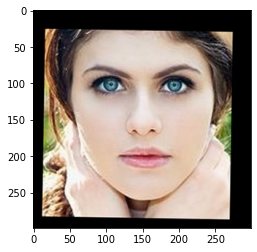

In [8]:
#Load a sample image
li = load_image('PINS/pins_alexandra daddario/alexandra daddario3.jpg')
plt.imshow(li)

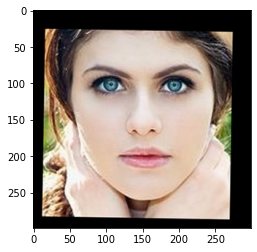

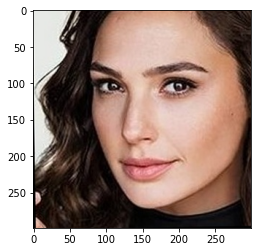

In [3]:
# Loading the image using imread
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('PINS/pins_alexandra daddario/alexandra daddario3.jpg')
img2 = cv2.imread('PINS/pins_gal gadot face/gal gadot face43.jpg')

plt.imshow(img1[...,::-1])
plt.show()
plt.imshow(img2[...,::-1])
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

# predefined VGG face model 

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [10]:
#Load the model defined above 
model = vgg_face() 
#load the weights
model.load_weights('vgg_face_weights.h5')  

In [49]:
model.summary() # print the model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [181]:
model.layers[0],model.layers[-2]

(<tensorflow.python.keras.layers.convolutional.ZeroPadding2D at 0x18c9e6fcf98>,
 <tensorflow.python.keras.layers.core.Flatten at 0x18c9e8f9f60>)

In [29]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output) # output of Flatten layer 

    vgg_face_descriptor Model is created from ZeroPadding2D(first layer) until Flatten layer 

In [36]:
# Generate embedding vector for first image using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1] 
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

PINS\pins_Aaron Paul\Aaron Paul0_262.jpg
(224, 224, 3)
(2622,)


In [68]:
# Generate embeddings for all images

embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    try:
        print(i, " + ", m)
        img_path = metadata[i].image_path()
        img = load_image(img_path)

        img = (img / 255.).astype(np.float32)
        img = cv2.resize(img, dsize = (224,224))

        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
        print("exception : ", m)
        embeddings[i] = np.zeros(2622)

0  +  PINS\pins_Aaron Paul\Aaron Paul0_262.jpg
PINS\pins_Aaron Paul\Aaron Paul0_262.jpg
1  +  PINS\pins_Aaron Paul\Aaron Paul101_247.jpg
PINS\pins_Aaron Paul\Aaron Paul101_247.jpg
2  +  PINS\pins_Aaron Paul\Aaron Paul101_248.jpg
PINS\pins_Aaron Paul\Aaron Paul101_248.jpg
3  +  PINS\pins_Aaron Paul\Aaron Paul101_249.jpg
PINS\pins_Aaron Paul\Aaron Paul101_249.jpg
4  +  PINS\pins_Aaron Paul\Aaron Paul103_217.jpg
PINS\pins_Aaron Paul\Aaron Paul103_217.jpg
5  +  PINS\pins_Aaron Paul\Aaron Paul113_228.jpg
PINS\pins_Aaron Paul\Aaron Paul113_228.jpg
6  +  PINS\pins_Aaron Paul\Aaron Paul114_271.jpg
PINS\pins_Aaron Paul\Aaron Paul114_271.jpg
7  +  PINS\pins_Aaron Paul\Aaron Paul116_240.jpg
PINS\pins_Aaron Paul\Aaron Paul116_240.jpg
8  +  PINS\pins_Aaron Paul\Aaron Paul117_213.jpg
PINS\pins_Aaron Paul\Aaron Paul117_213.jpg
9  +  PINS\pins_Aaron Paul\Aaron Paul119_219.jpg
PINS\pins_Aaron Paul\Aaron Paul119_219.jpg
10  +  PINS\pins_Aaron Paul\Aaron Paul120_290.jpg
PINS\pins_Aaron Paul\Aaron Paul120

89  +  PINS\pins_alexandra daddario\alexandra daddario100.jpg
PINS\pins_alexandra daddario\alexandra daddario100.jpg
90  +  PINS\pins_alexandra daddario\alexandra daddario101.jpg
PINS\pins_alexandra daddario\alexandra daddario101.jpg
91  +  PINS\pins_alexandra daddario\alexandra daddario102.jpg
PINS\pins_alexandra daddario\alexandra daddario102.jpg
92  +  PINS\pins_alexandra daddario\alexandra daddario103.jpg
PINS\pins_alexandra daddario\alexandra daddario103.jpg
93  +  PINS\pins_alexandra daddario\alexandra daddario104.jpg
PINS\pins_alexandra daddario\alexandra daddario104.jpg
94  +  PINS\pins_alexandra daddario\alexandra daddario105.jpg
PINS\pins_alexandra daddario\alexandra daddario105.jpg
95  +  PINS\pins_alexandra daddario\alexandra daddario106.jpg
PINS\pins_alexandra daddario\alexandra daddario106.jpg
96  +  PINS\pins_alexandra daddario\alexandra daddario107.jpg
PINS\pins_alexandra daddario\alexandra daddario107.jpg
97  +  PINS\pins_alexandra daddario\alexandra daddario108.jpg
PI

159  +  PINS\pins_alexandra daddario\alexandra daddario164.jpg
PINS\pins_alexandra daddario\alexandra daddario164.jpg
160  +  PINS\pins_alexandra daddario\alexandra daddario165.jpg
PINS\pins_alexandra daddario\alexandra daddario165.jpg
161  +  PINS\pins_alexandra daddario\alexandra daddario166.jpg
PINS\pins_alexandra daddario\alexandra daddario166.jpg
162  +  PINS\pins_alexandra daddario\alexandra daddario17.jpg
PINS\pins_alexandra daddario\alexandra daddario17.jpg
163  +  PINS\pins_alexandra daddario\alexandra daddario18.jpg
PINS\pins_alexandra daddario\alexandra daddario18.jpg
164  +  PINS\pins_alexandra daddario\alexandra daddario19.jpg
PINS\pins_alexandra daddario\alexandra daddario19.jpg
165  +  PINS\pins_alexandra daddario\alexandra daddario2.jpg
PINS\pins_alexandra daddario\alexandra daddario2.jpg
166  +  PINS\pins_alexandra daddario\alexandra daddario20.jpg
PINS\pins_alexandra daddario\alexandra daddario20.jpg
167  +  PINS\pins_alexandra daddario\alexandra daddario21.jpg
PINS\p

230  +  PINS\pins_alexandra daddario\alexandra daddario80.jpg
PINS\pins_alexandra daddario\alexandra daddario80.jpg
231  +  PINS\pins_alexandra daddario\alexandra daddario81.jpg
PINS\pins_alexandra daddario\alexandra daddario81.jpg
232  +  PINS\pins_alexandra daddario\alexandra daddario82.jpg
PINS\pins_alexandra daddario\alexandra daddario82.jpg
233  +  PINS\pins_alexandra daddario\alexandra daddario83.jpg
PINS\pins_alexandra daddario\alexandra daddario83.jpg
234  +  PINS\pins_alexandra daddario\alexandra daddario84.jpg
PINS\pins_alexandra daddario\alexandra daddario84.jpg
235  +  PINS\pins_alexandra daddario\alexandra daddario85.jpg
PINS\pins_alexandra daddario\alexandra daddario85.jpg
236  +  PINS\pins_alexandra daddario\alexandra daddario86.jpg
PINS\pins_alexandra daddario\alexandra daddario86.jpg
237  +  PINS\pins_alexandra daddario\alexandra daddario87.jpg
PINS\pins_alexandra daddario\alexandra daddario87.jpg
238  +  PINS\pins_alexandra daddario\alexandra daddario88.jpg
PINS\pins_

308  +  PINS\pins_Alvaro Morte\Alvaro Morte48_798.jpg
PINS\pins_Alvaro Morte\Alvaro Morte48_798.jpg
309  +  PINS\pins_Alvaro Morte\Alvaro Morte4_797.jpg
PINS\pins_Alvaro Morte\Alvaro Morte4_797.jpg
310  +  PINS\pins_Alvaro Morte\Alvaro Morte52_793.jpg
PINS\pins_Alvaro Morte\Alvaro Morte52_793.jpg
311  +  PINS\pins_Alvaro Morte\Alvaro Morte53_826.jpg
PINS\pins_Alvaro Morte\Alvaro Morte53_826.jpg
312  +  PINS\pins_Alvaro Morte\Alvaro Morte53_827.jpg
PINS\pins_Alvaro Morte\Alvaro Morte53_827.jpg
313  +  PINS\pins_Alvaro Morte\Alvaro Morte54_869.jpg
PINS\pins_Alvaro Morte\Alvaro Morte54_869.jpg
314  +  PINS\pins_Alvaro Morte\Alvaro Morte55_801.jpg
PINS\pins_Alvaro Morte\Alvaro Morte55_801.jpg
315  +  PINS\pins_Alvaro Morte\Alvaro Morte56_794.jpg
PINS\pins_Alvaro Morte\Alvaro Morte56_794.jpg
316  +  PINS\pins_Alvaro Morte\Alvaro Morte58_866.jpg
PINS\pins_Alvaro Morte\Alvaro Morte58_866.jpg
317  +  PINS\pins_Alvaro Morte\Alvaro Morte59_823.jpg
PINS\pins_Alvaro Morte\Alvaro Morte59_823.jpg
31

376  +  PINS\pins_alycia debnam carey face\alycia debnam carey face131.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face131.jpg
377  +  PINS\pins_alycia debnam carey face\alycia debnam carey face132.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face132.jpg
378  +  PINS\pins_alycia debnam carey face\alycia debnam carey face133.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face133.jpg
379  +  PINS\pins_alycia debnam carey face\alycia debnam carey face134.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face134.jpg
380  +  PINS\pins_alycia debnam carey face\alycia debnam carey face135.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face135.jpg
381  +  PINS\pins_alycia debnam carey face\alycia debnam carey face136.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face136.jpg
382  +  PINS\pins_alycia debnam carey face\alycia debnam carey face137.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face137.jpg
383  +

435  +  PINS\pins_alycia debnam carey face\alycia debnam carey face51.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face51.jpg
436  +  PINS\pins_alycia debnam carey face\alycia debnam carey face52.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face52.jpg
437  +  PINS\pins_alycia debnam carey face\alycia debnam carey face53.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face53.jpg
438  +  PINS\pins_alycia debnam carey face\alycia debnam carey face54.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face54.jpg
439  +  PINS\pins_alycia debnam carey face\alycia debnam carey face55.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face55.jpg
440  +  PINS\pins_alycia debnam carey face\alycia debnam carey face56.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face56.jpg
441  +  PINS\pins_alycia debnam carey face\alycia debnam carey face57.jpg
PINS\pins_alycia debnam carey face\alycia debnam carey face57.jpg
442  +  PINS\pins_al

498  +  PINS\pins_Amanda Crew\Amanda Crew109.jpg
PINS\pins_Amanda Crew\Amanda Crew109.jpg
499  +  PINS\pins_Amanda Crew\Amanda Crew11.jpg
PINS\pins_Amanda Crew\Amanda Crew11.jpg
500  +  PINS\pins_Amanda Crew\Amanda Crew110.jpg
PINS\pins_Amanda Crew\Amanda Crew110.jpg
501  +  PINS\pins_Amanda Crew\Amanda Crew113.jpg
PINS\pins_Amanda Crew\Amanda Crew113.jpg
502  +  PINS\pins_Amanda Crew\Amanda Crew114.jpg
PINS\pins_Amanda Crew\Amanda Crew114.jpg
503  +  PINS\pins_Amanda Crew\Amanda Crew115.jpg
PINS\pins_Amanda Crew\Amanda Crew115.jpg
504  +  PINS\pins_Amanda Crew\Amanda Crew116.jpg
PINS\pins_Amanda Crew\Amanda Crew116.jpg
505  +  PINS\pins_Amanda Crew\Amanda Crew117.jpg
PINS\pins_Amanda Crew\Amanda Crew117.jpg
506  +  PINS\pins_Amanda Crew\Amanda Crew118.jpg
PINS\pins_Amanda Crew\Amanda Crew118.jpg
507  +  PINS\pins_Amanda Crew\Amanda Crew119.jpg
PINS\pins_Amanda Crew\Amanda Crew119.jpg
508  +  PINS\pins_Amanda Crew\Amanda Crew12.jpg
PINS\pins_Amanda Crew\Amanda Crew12.jpg
509  +  PINS\p

591  +  PINS\pins_Amanda Crew\Amanda Crew86.jpg
PINS\pins_Amanda Crew\Amanda Crew86.jpg
592  +  PINS\pins_Amanda Crew\Amanda Crew87.jpg
PINS\pins_Amanda Crew\Amanda Crew87.jpg
593  +  PINS\pins_Amanda Crew\Amanda Crew88.jpg
PINS\pins_Amanda Crew\Amanda Crew88.jpg
594  +  PINS\pins_Amanda Crew\Amanda Crew89.jpg
PINS\pins_Amanda Crew\Amanda Crew89.jpg
595  +  PINS\pins_Amanda Crew\Amanda Crew9.jpg
PINS\pins_Amanda Crew\Amanda Crew9.jpg
596  +  PINS\pins_Amanda Crew\Amanda Crew90.jpg
PINS\pins_Amanda Crew\Amanda Crew90.jpg
597  +  PINS\pins_Amanda Crew\Amanda Crew91.jpg
PINS\pins_Amanda Crew\Amanda Crew91.jpg
598  +  PINS\pins_Amanda Crew\Amanda Crew93.jpg
PINS\pins_Amanda Crew\Amanda Crew93.jpg
599  +  PINS\pins_Amanda Crew\Amanda Crew94.jpg
PINS\pins_Amanda Crew\Amanda Crew94.jpg
600  +  PINS\pins_Amanda Crew\Amanda Crew95.jpg
PINS\pins_Amanda Crew\Amanda Crew95.jpg
601  +  PINS\pins_Amanda Crew\Amanda Crew96.jpg
PINS\pins_Amanda Crew\Amanda Crew96.jpg
602  +  PINS\pins_Amanda Crew\Aman

675  +  PINS\pins_Amaury Nolasco\Amaury Nolasco60.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco60.jpg
676  +  PINS\pins_Amaury Nolasco\Amaury Nolasco61.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco61.jpg
677  +  PINS\pins_Amaury Nolasco\Amaury Nolasco62.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco62.jpg
678  +  PINS\pins_Amaury Nolasco\Amaury Nolasco63.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco63.jpg
679  +  PINS\pins_Amaury Nolasco\Amaury Nolasco64.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco64.jpg
680  +  PINS\pins_Amaury Nolasco\Amaury Nolasco65.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco65.jpg
681  +  PINS\pins_Amaury Nolasco\Amaury Nolasco66.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco66.jpg
682  +  PINS\pins_Amaury Nolasco\Amaury Nolasco67.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco67.jpg
683  +  PINS\pins_Amaury Nolasco\Amaury Nolasco68.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco68.jpg
684  +  PINS\pins_Amaury Nolasco\Amaury Nolasco69.jpg
PINS\pins_Amaury Nolasco\Amaury Nolasco69.jpg


754  +  PINS\pins_amber heard face\amber heard face131.jpg
PINS\pins_amber heard face\amber heard face131.jpg
755  +  PINS\pins_amber heard face\amber heard face132.jpg
PINS\pins_amber heard face\amber heard face132.jpg
756  +  PINS\pins_amber heard face\amber heard face133.jpg
PINS\pins_amber heard face\amber heard face133.jpg
757  +  PINS\pins_amber heard face\amber heard face134.jpg
PINS\pins_amber heard face\amber heard face134.jpg
758  +  PINS\pins_amber heard face\amber heard face135.jpg
PINS\pins_amber heard face\amber heard face135.jpg
759  +  PINS\pins_amber heard face\amber heard face136.jpg
PINS\pins_amber heard face\amber heard face136.jpg
760  +  PINS\pins_amber heard face\amber heard face137.jpg
PINS\pins_amber heard face\amber heard face137.jpg
761  +  PINS\pins_amber heard face\amber heard face138.jpg
PINS\pins_amber heard face\amber heard face138.jpg
762  +  PINS\pins_amber heard face\amber heard face139.jpg
PINS\pins_amber heard face\amber heard face139.jpg
763  +  PI

830  +  PINS\pins_amber heard face\amber heard face65.jpg
PINS\pins_amber heard face\amber heard face65.jpg
831  +  PINS\pins_amber heard face\amber heard face66.jpg
PINS\pins_amber heard face\amber heard face66.jpg
832  +  PINS\pins_amber heard face\amber heard face67.jpg
PINS\pins_amber heard face\amber heard face67.jpg
833  +  PINS\pins_amber heard face\amber heard face68.jpg
PINS\pins_amber heard face\amber heard face68.jpg
834  +  PINS\pins_amber heard face\amber heard face69.jpg
PINS\pins_amber heard face\amber heard face69.jpg
835  +  PINS\pins_amber heard face\amber heard face7.jpg
PINS\pins_amber heard face\amber heard face7.jpg
836  +  PINS\pins_amber heard face\amber heard face70.jpg
PINS\pins_amber heard face\amber heard face70.jpg
837  +  PINS\pins_amber heard face\amber heard face71.jpg
PINS\pins_amber heard face\amber heard face71.jpg
838  +  PINS\pins_amber heard face\amber heard face72.jpg
PINS\pins_amber heard face\amber heard face72.jpg
839  +  PINS\pins_amber heard 

913  +  PINS\pins_Anna Gunn\Anna Gunn33_2325.jpg
PINS\pins_Anna Gunn\Anna Gunn33_2325.jpg
914  +  PINS\pins_Anna Gunn\Anna Gunn36_2303.jpg
PINS\pins_Anna Gunn\Anna Gunn36_2303.jpg
915  +  PINS\pins_Anna Gunn\Anna Gunn3_2291.jpg
PINS\pins_Anna Gunn\Anna Gunn3_2291.jpg
916  +  PINS\pins_Anna Gunn\Anna Gunn44_2272.jpg
PINS\pins_Anna Gunn\Anna Gunn44_2272.jpg
917  +  PINS\pins_Anna Gunn\Anna Gunn48_2321.jpg
PINS\pins_Anna Gunn\Anna Gunn48_2321.jpg
918  +  PINS\pins_Anna Gunn\Anna Gunn50_2278.jpg
PINS\pins_Anna Gunn\Anna Gunn50_2278.jpg
919  +  PINS\pins_Anna Gunn\Anna Gunn51_2317.jpg
PINS\pins_Anna Gunn\Anna Gunn51_2317.jpg
920  +  PINS\pins_Anna Gunn\Anna Gunn5_2318.jpg
PINS\pins_Anna Gunn\Anna Gunn5_2318.jpg
921  +  PINS\pins_Anna Gunn\Anna Gunn62_2280.jpg
PINS\pins_Anna Gunn\Anna Gunn62_2280.jpg
922  +  PINS\pins_Anna Gunn\Anna Gunn6_2327.jpg
PINS\pins_Anna Gunn\Anna Gunn6_2327.jpg
923  +  PINS\pins_Anna Gunn\Anna Gunn73_2275.jpg
PINS\pins_Anna Gunn\Anna Gunn73_2275.jpg
924  +  PINS\pin

999  +  PINS\pins_anne hathaway\anne hathaway20.jpg
PINS\pins_anne hathaway\anne hathaway20.jpg
1000  +  PINS\pins_anne hathaway\anne hathaway21.jpg
PINS\pins_anne hathaway\anne hathaway21.jpg
1001  +  PINS\pins_anne hathaway\anne hathaway22.jpg
PINS\pins_anne hathaway\anne hathaway22.jpg
1002  +  PINS\pins_anne hathaway\anne hathaway23.jpg
PINS\pins_anne hathaway\anne hathaway23.jpg
1003  +  PINS\pins_anne hathaway\anne hathaway24.jpg
PINS\pins_anne hathaway\anne hathaway24.jpg
1004  +  PINS\pins_anne hathaway\anne hathaway25.jpg
PINS\pins_anne hathaway\anne hathaway25.jpg
1005  +  PINS\pins_anne hathaway\anne hathaway26.jpg
PINS\pins_anne hathaway\anne hathaway26.jpg
1006  +  PINS\pins_anne hathaway\anne hathaway27.jpg
PINS\pins_anne hathaway\anne hathaway27.jpg
1007  +  PINS\pins_anne hathaway\anne hathaway28.jpg
PINS\pins_anne hathaway\anne hathaway28.jpg
1008  +  PINS\pins_anne hathaway\anne hathaway29.jpg
PINS\pins_anne hathaway\anne hathaway29.jpg
1009  +  PINS\pins_anne hathawa

1084  +  PINS\pins_anne hathaway\anne hathaway99.jpg
PINS\pins_anne hathaway\anne hathaway99.jpg
1085  +  PINS\pins_barbara palvin face\barbara palvin face0.jpg
PINS\pins_barbara palvin face\barbara palvin face0.jpg
1086  +  PINS\pins_barbara palvin face\barbara palvin face1.jpg
PINS\pins_barbara palvin face\barbara palvin face1.jpg
1087  +  PINS\pins_barbara palvin face\barbara palvin face10.jpg
PINS\pins_barbara palvin face\barbara palvin face10.jpg
1088  +  PINS\pins_barbara palvin face\barbara palvin face100.jpg
PINS\pins_barbara palvin face\barbara palvin face100.jpg
1089  +  PINS\pins_barbara palvin face\barbara palvin face101.jpg
PINS\pins_barbara palvin face\barbara palvin face101.jpg
1090  +  PINS\pins_barbara palvin face\barbara palvin face102.jpg
PINS\pins_barbara palvin face\barbara palvin face102.jpg
1091  +  PINS\pins_barbara palvin face\barbara palvin face103.jpg
PINS\pins_barbara palvin face\barbara palvin face103.jpg
1092  +  PINS\pins_barbara palvin face\barbara palvi

1152  +  PINS\pins_barbara palvin face\barbara palvin face31.jpg
PINS\pins_barbara palvin face\barbara palvin face31.jpg
1153  +  PINS\pins_barbara palvin face\barbara palvin face32.jpg
PINS\pins_barbara palvin face\barbara palvin face32.jpg
1154  +  PINS\pins_barbara palvin face\barbara palvin face33.jpg
PINS\pins_barbara palvin face\barbara palvin face33.jpg
1155  +  PINS\pins_barbara palvin face\barbara palvin face34.jpg
PINS\pins_barbara palvin face\barbara palvin face34.jpg
1156  +  PINS\pins_barbara palvin face\barbara palvin face35.jpg
PINS\pins_barbara palvin face\barbara palvin face35.jpg
1157  +  PINS\pins_barbara palvin face\barbara palvin face36.jpg
PINS\pins_barbara palvin face\barbara palvin face36.jpg
1158  +  PINS\pins_barbara palvin face\barbara palvin face37.jpg
PINS\pins_barbara palvin face\barbara palvin face37.jpg
1159  +  PINS\pins_barbara palvin face\barbara palvin face38.jpg
PINS\pins_barbara palvin face\barbara palvin face38.jpg
1160  +  PINS\pins_barbara palvi

1220  +  PINS\pins_barbara palvin face\barbara palvin face93.jpg
PINS\pins_barbara palvin face\barbara palvin face93.jpg
1221  +  PINS\pins_barbara palvin face\barbara palvin face94.jpg
PINS\pins_barbara palvin face\barbara palvin face94.jpg
1222  +  PINS\pins_barbara palvin face\barbara palvin face95.jpg
PINS\pins_barbara palvin face\barbara palvin face95.jpg
1223  +  PINS\pins_barbara palvin face\barbara palvin face96.jpg
PINS\pins_barbara palvin face\barbara palvin face96.jpg
1224  +  PINS\pins_barbara palvin face\barbara palvin face97.jpg
PINS\pins_barbara palvin face\barbara palvin face97.jpg
1225  +  PINS\pins_barbara palvin face\barbara palvin face98.jpg
PINS\pins_barbara palvin face\barbara palvin face98.jpg
1226  +  PINS\pins_barbara palvin face\barbara palvin face99.jpg
PINS\pins_barbara palvin face\barbara palvin face99.jpg
1227  +  PINS\pins_bellamy blake face\bellamy blake face0.jpg
PINS\pins_bellamy blake face\bellamy blake face0.jpg
1228  +  PINS\pins_bellamy blake face\

1290  +  PINS\pins_bellamy blake face\bellamy blake face67.jpg
PINS\pins_bellamy blake face\bellamy blake face67.jpg
1291  +  PINS\pins_bellamy blake face\bellamy blake face68.jpg
PINS\pins_bellamy blake face\bellamy blake face68.jpg
1292  +  PINS\pins_bellamy blake face\bellamy blake face69.jpg
PINS\pins_bellamy blake face\bellamy blake face69.jpg
1293  +  PINS\pins_bellamy blake face\bellamy blake face7.jpg
PINS\pins_bellamy blake face\bellamy blake face7.jpg
1294  +  PINS\pins_bellamy blake face\bellamy blake face70.jpg
PINS\pins_bellamy blake face\bellamy blake face70.jpg
1295  +  PINS\pins_bellamy blake face\bellamy blake face71.jpg
PINS\pins_bellamy blake face\bellamy blake face71.jpg
1296  +  PINS\pins_bellamy blake face\bellamy blake face72.jpg
PINS\pins_bellamy blake face\bellamy blake face72.jpg
1297  +  PINS\pins_bellamy blake face\bellamy blake face73.jpg
PINS\pins_bellamy blake face\bellamy blake face73.jpg
1298  +  PINS\pins_bellamy blake face\bellamy blake face74.jpg
PIN

1358  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch47.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch47.jpg
1359  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch48.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch48.jpg
1360  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch49.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch49.jpg
1361  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch5.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch5.jpg
1362  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch50.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch50.jpg
1363  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch51.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch51.jpg
1364  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch52.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch52.jpg
1365  +  PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch53.jpg
PINS\pins_Benedict Cumberbatch\Benedict Cumberbatch53.jpg
13

1430  +  PINS\pins_Betsy Brandt\Betsy Brandt20_437.jpg
PINS\pins_Betsy Brandt\Betsy Brandt20_437.jpg
1431  +  PINS\pins_Betsy Brandt\Betsy Brandt21_422.jpg
PINS\pins_Betsy Brandt\Betsy Brandt21_422.jpg
1432  +  PINS\pins_Betsy Brandt\Betsy Brandt22_386.jpg
PINS\pins_Betsy Brandt\Betsy Brandt22_386.jpg
1433  +  PINS\pins_Betsy Brandt\Betsy Brandt23_440.jpg
PINS\pins_Betsy Brandt\Betsy Brandt23_440.jpg
1434  +  PINS\pins_Betsy Brandt\Betsy Brandt27_421.jpg
PINS\pins_Betsy Brandt\Betsy Brandt27_421.jpg
1435  +  PINS\pins_Betsy Brandt\Betsy Brandt29_438.jpg
PINS\pins_Betsy Brandt\Betsy Brandt29_438.jpg
1436  +  PINS\pins_Betsy Brandt\Betsy Brandt2_439.jpg
PINS\pins_Betsy Brandt\Betsy Brandt2_439.jpg
1437  +  PINS\pins_Betsy Brandt\Betsy Brandt32_413.jpg
PINS\pins_Betsy Brandt\Betsy Brandt32_413.jpg
1438  +  PINS\pins_Betsy Brandt\Betsy Brandt36_401.jpg
PINS\pins_Betsy Brandt\Betsy Brandt36_401.jpg
1439  +  PINS\pins_Betsy Brandt\Betsy Brandt37_382.jpg
PINS\pins_Betsy Brandt\Betsy Brandt37_

1521  +  PINS\pins_bill gates\bill gates60.jpg
PINS\pins_bill gates\bill gates60.jpg
1522  +  PINS\pins_bill gates\bill gates61.jpg
PINS\pins_bill gates\bill gates61.jpg
1523  +  PINS\pins_bill gates\bill gates62.jpg
PINS\pins_bill gates\bill gates62.jpg
1524  +  PINS\pins_bill gates\bill gates63.jpg
PINS\pins_bill gates\bill gates63.jpg
1525  +  PINS\pins_bill gates\bill gates64.jpg
PINS\pins_bill gates\bill gates64.jpg
1526  +  PINS\pins_bill gates\bill gates65.jpg
PINS\pins_bill gates\bill gates65.jpg
1527  +  PINS\pins_bill gates\bill gates66.jpg
PINS\pins_bill gates\bill gates66.jpg
1528  +  PINS\pins_bill gates\bill gates67.jpg
PINS\pins_bill gates\bill gates67.jpg
1529  +  PINS\pins_bill gates\bill gates68.jpg
PINS\pins_bill gates\bill gates68.jpg
1530  +  PINS\pins_bill gates\bill gates69.jpg
PINS\pins_bill gates\bill gates69.jpg
1531  +  PINS\pins_bill gates\bill gates7.jpg
PINS\pins_bill gates\bill gates7.jpg
1532  +  PINS\pins_bill gates\bill gates70.jpg
PINS\pins_bill gates

1603  +  PINS\pins_Brenton Thwaites\Brenton Thwaites29.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites29.jpg
1604  +  PINS\pins_Brenton Thwaites\Brenton Thwaites3.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites3.jpg
1605  +  PINS\pins_Brenton Thwaites\Brenton Thwaites30.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites30.jpg
1606  +  PINS\pins_Brenton Thwaites\Brenton Thwaites31.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites31.jpg
1607  +  PINS\pins_Brenton Thwaites\Brenton Thwaites32.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites32.jpg
1608  +  PINS\pins_Brenton Thwaites\Brenton Thwaites33.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites33.jpg
1609  +  PINS\pins_Brenton Thwaites\Brenton Thwaites34.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites34.jpg
1610  +  PINS\pins_Brenton Thwaites\Brenton Thwaites35.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites35.jpg
1611  +  PINS\pins_Brenton Thwaites\Brenton Thwaites36.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites36.jpg
1612  +  PINS\pins_Br

1679  +  PINS\pins_Brenton Thwaites\Brenton Thwaites98.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites98.jpg
1680  +  PINS\pins_Brenton Thwaites\Brenton Thwaites99.jpg
PINS\pins_Brenton Thwaites\Brenton Thwaites99.jpg
1681  +  PINS\pins_brie larson\brie larson0.jpg
PINS\pins_brie larson\brie larson0.jpg
1682  +  PINS\pins_brie larson\brie larson1.jpg
PINS\pins_brie larson\brie larson1.jpg
1683  +  PINS\pins_brie larson\brie larson10.jpg
PINS\pins_brie larson\brie larson10.jpg
1684  +  PINS\pins_brie larson\brie larson100.jpg
PINS\pins_brie larson\brie larson100.jpg
1685  +  PINS\pins_brie larson\brie larson101.jpg
PINS\pins_brie larson\brie larson101.jpg
1686  +  PINS\pins_brie larson\brie larson102.jpg
PINS\pins_brie larson\brie larson102.jpg
1687  +  PINS\pins_brie larson\brie larson103.jpg
PINS\pins_brie larson\brie larson103.jpg
1688  +  PINS\pins_brie larson\brie larson104.jpg
PINS\pins_brie larson\brie larson104.jpg
1689  +  PINS\pins_brie larson\brie larson105.jpg
PINS\pins_brie

1771  +  PINS\pins_brie larson\brie larson64.jpg
PINS\pins_brie larson\brie larson64.jpg
1772  +  PINS\pins_brie larson\brie larson65.jpg
PINS\pins_brie larson\brie larson65.jpg
1773  +  PINS\pins_brie larson\brie larson66.jpg
PINS\pins_brie larson\brie larson66.jpg
1774  +  PINS\pins_brie larson\brie larson67.jpg
PINS\pins_brie larson\brie larson67.jpg
1775  +  PINS\pins_brie larson\brie larson68.jpg
PINS\pins_brie larson\brie larson68.jpg
1776  +  PINS\pins_brie larson\brie larson69.jpg
PINS\pins_brie larson\brie larson69.jpg
1777  +  PINS\pins_brie larson\brie larson7.jpg
PINS\pins_brie larson\brie larson7.jpg
1778  +  PINS\pins_brie larson\brie larson70.jpg
PINS\pins_brie larson\brie larson70.jpg
1779  +  PINS\pins_brie larson\brie larson71.jpg
PINS\pins_brie larson\brie larson71.jpg
1780  +  PINS\pins_brie larson\brie larson72.jpg
PINS\pins_brie larson\brie larson72.jpg
1781  +  PINS\pins_brie larson\brie larson73.jpg
PINS\pins_brie larson\brie larson73.jpg
1782  +  PINS\pins_brie

1856  +  PINS\pins_Brit Marling\Brit Marling174_567.jpg
PINS\pins_Brit Marling\Brit Marling174_567.jpg
1857  +  PINS\pins_Brit Marling\Brit Marling177_460.jpg
PINS\pins_Brit Marling\Brit Marling177_460.jpg
1858  +  PINS\pins_Brit Marling\Brit Marling179_491.jpg
PINS\pins_Brit Marling\Brit Marling179_491.jpg
1859  +  PINS\pins_Brit Marling\Brit Marling181_556.jpg
PINS\pins_Brit Marling\Brit Marling181_556.jpg
1860  +  PINS\pins_Brit Marling\Brit Marling182_524.jpg
PINS\pins_Brit Marling\Brit Marling182_524.jpg
1861  +  PINS\pins_Brit Marling\Brit Marling183_505.jpg
PINS\pins_Brit Marling\Brit Marling183_505.jpg
1862  +  PINS\pins_Brit Marling\Brit Marling184_500.jpg
PINS\pins_Brit Marling\Brit Marling184_500.jpg
1863  +  PINS\pins_Brit Marling\Brit Marling187_478.jpg
PINS\pins_Brit Marling\Brit Marling187_478.jpg
1864  +  PINS\pins_Brit Marling\Brit Marling188_509.jpg
PINS\pins_Brit Marling\Brit Marling188_509.jpg
1865  +  PINS\pins_Brit Marling\Brit Marling192_517.jpg
PINS\pins_Brit Ma

1937  +  PINS\pins_Bryan Cranston\Bryan Cranston126_1217.jpg
PINS\pins_Bryan Cranston\Bryan Cranston126_1217.jpg
1938  +  PINS\pins_Bryan Cranston\Bryan Cranston12_1222.jpg
PINS\pins_Bryan Cranston\Bryan Cranston12_1222.jpg
1939  +  PINS\pins_Bryan Cranston\Bryan Cranston130_1242.jpg
PINS\pins_Bryan Cranston\Bryan Cranston130_1242.jpg
1940  +  PINS\pins_Bryan Cranston\Bryan Cranston131_1235.jpg
PINS\pins_Bryan Cranston\Bryan Cranston131_1235.jpg
1941  +  PINS\pins_Bryan Cranston\Bryan Cranston134_1196.jpg
PINS\pins_Bryan Cranston\Bryan Cranston134_1196.jpg
1942  +  PINS\pins_Bryan Cranston\Bryan Cranston135_1228.jpg
PINS\pins_Bryan Cranston\Bryan Cranston135_1228.jpg
1943  +  PINS\pins_Bryan Cranston\Bryan Cranston137_1188.jpg
PINS\pins_Bryan Cranston\Bryan Cranston137_1188.jpg
1944  +  PINS\pins_Bryan Cranston\Bryan Cranston13_1198.jpg
PINS\pins_Bryan Cranston\Bryan Cranston13_1198.jpg
1945  +  PINS\pins_Bryan Cranston\Bryan Cranston149_1237.jpg
PINS\pins_Bryan Cranston\Bryan Cranston

2011  +  PINS\pins_Caity Lotz\Caity Lotz0.jpg
PINS\pins_Caity Lotz\Caity Lotz0.jpg
2012  +  PINS\pins_Caity Lotz\Caity Lotz1.jpg
PINS\pins_Caity Lotz\Caity Lotz1.jpg
2013  +  PINS\pins_Caity Lotz\Caity Lotz10.jpg
PINS\pins_Caity Lotz\Caity Lotz10.jpg
2014  +  PINS\pins_Caity Lotz\Caity Lotz100.jpg
PINS\pins_Caity Lotz\Caity Lotz100.jpg
2015  +  PINS\pins_Caity Lotz\Caity Lotz101.jpg
PINS\pins_Caity Lotz\Caity Lotz101.jpg
2016  +  PINS\pins_Caity Lotz\Caity Lotz102.jpg
PINS\pins_Caity Lotz\Caity Lotz102.jpg
2017  +  PINS\pins_Caity Lotz\Caity Lotz103.jpg
PINS\pins_Caity Lotz\Caity Lotz103.jpg
2018  +  PINS\pins_Caity Lotz\Caity Lotz105.jpg
PINS\pins_Caity Lotz\Caity Lotz105.jpg
2019  +  PINS\pins_Caity Lotz\Caity Lotz106.jpg
PINS\pins_Caity Lotz\Caity Lotz106.jpg
2020  +  PINS\pins_Caity Lotz\Caity Lotz107.jpg
PINS\pins_Caity Lotz\Caity Lotz107.jpg
2021  +  PINS\pins_Caity Lotz\Caity Lotz108.jpg
PINS\pins_Caity Lotz\Caity Lotz108.jpg
2022  +  PINS\pins_Caity Lotz\Caity Lotz109.jpg
PINS\

2107  +  PINS\pins_Caity Lotz\Caity Lotz75.jpg
PINS\pins_Caity Lotz\Caity Lotz75.jpg
2108  +  PINS\pins_Caity Lotz\Caity Lotz76.jpg
PINS\pins_Caity Lotz\Caity Lotz76.jpg
2109  +  PINS\pins_Caity Lotz\Caity Lotz77.jpg
PINS\pins_Caity Lotz\Caity Lotz77.jpg
2110  +  PINS\pins_Caity Lotz\Caity Lotz78.jpg
PINS\pins_Caity Lotz\Caity Lotz78.jpg
2111  +  PINS\pins_Caity Lotz\Caity Lotz79.jpg
PINS\pins_Caity Lotz\Caity Lotz79.jpg
2112  +  PINS\pins_Caity Lotz\Caity Lotz8.jpg
PINS\pins_Caity Lotz\Caity Lotz8.jpg
2113  +  PINS\pins_Caity Lotz\Caity Lotz80.jpg
PINS\pins_Caity Lotz\Caity Lotz80.jpg
2114  +  PINS\pins_Caity Lotz\Caity Lotz81.jpg
PINS\pins_Caity Lotz\Caity Lotz81.jpg
2115  +  PINS\pins_Caity Lotz\Caity Lotz82.jpg
PINS\pins_Caity Lotz\Caity Lotz82.jpg
2116  +  PINS\pins_Caity Lotz\Caity Lotz83.jpg
PINS\pins_Caity Lotz\Caity Lotz83.jpg
2117  +  PINS\pins_Caity Lotz\Caity Lotz84.jpg
PINS\pins_Caity Lotz\Caity Lotz84.jpg
2118  +  PINS\pins_Caity Lotz\Caity Lotz85.jpg
PINS\pins_Caity Lotz

2188  +  PINS\pins_Cameron Monaghan\Cameron Monaghan45.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan45.jpg
2189  +  PINS\pins_Cameron Monaghan\Cameron Monaghan46.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan46.jpg
2190  +  PINS\pins_Cameron Monaghan\Cameron Monaghan47.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan47.jpg
2191  +  PINS\pins_Cameron Monaghan\Cameron Monaghan48.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan48.jpg
2192  +  PINS\pins_Cameron Monaghan\Cameron Monaghan49.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan49.jpg
2193  +  PINS\pins_Cameron Monaghan\Cameron Monaghan5.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan5.jpg
2194  +  PINS\pins_Cameron Monaghan\Cameron Monaghan50.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan50.jpg
2195  +  PINS\pins_Cameron Monaghan\Cameron Monaghan51.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan51.jpg
2196  +  PINS\pins_Cameron Monaghan\Cameron Monaghan52.jpg
PINS\pins_Cameron Monaghan\Cameron Monaghan52.jpg
2197  +  PINS\pins_Ca

2261  +  PINS\pins_chadwick boseman face\chadwick boseman face111.jpg
PINS\pins_chadwick boseman face\chadwick boseman face111.jpg
2262  +  PINS\pins_chadwick boseman face\chadwick boseman face112.jpg
PINS\pins_chadwick boseman face\chadwick boseman face112.jpg
2263  +  PINS\pins_chadwick boseman face\chadwick boseman face113.jpg
PINS\pins_chadwick boseman face\chadwick boseman face113.jpg
2264  +  PINS\pins_chadwick boseman face\chadwick boseman face114.jpg
PINS\pins_chadwick boseman face\chadwick boseman face114.jpg
2265  +  PINS\pins_chadwick boseman face\chadwick boseman face115.jpg
PINS\pins_chadwick boseman face\chadwick boseman face115.jpg
2266  +  PINS\pins_chadwick boseman face\chadwick boseman face116.jpg
PINS\pins_chadwick boseman face\chadwick boseman face116.jpg
2267  +  PINS\pins_chadwick boseman face\chadwick boseman face117.jpg
PINS\pins_chadwick boseman face\chadwick boseman face117.jpg
2268  +  PINS\pins_chadwick boseman face\chadwick boseman face118.jpg
PINS\pins_cha

2325  +  PINS\pins_chadwick boseman face\chadwick boseman face63.jpg
PINS\pins_chadwick boseman face\chadwick boseman face63.jpg
2326  +  PINS\pins_chadwick boseman face\chadwick boseman face64.jpg
PINS\pins_chadwick boseman face\chadwick boseman face64.jpg
2327  +  PINS\pins_chadwick boseman face\chadwick boseman face65.jpg
PINS\pins_chadwick boseman face\chadwick boseman face65.jpg
2328  +  PINS\pins_chadwick boseman face\chadwick boseman face66.jpg
PINS\pins_chadwick boseman face\chadwick boseman face66.jpg
2329  +  PINS\pins_chadwick boseman face\chadwick boseman face67.jpg
PINS\pins_chadwick boseman face\chadwick boseman face67.jpg
2330  +  PINS\pins_chadwick boseman face\chadwick boseman face68.jpg
PINS\pins_chadwick boseman face\chadwick boseman face68.jpg
2331  +  PINS\pins_chadwick boseman face\chadwick boseman face69.jpg
PINS\pins_chadwick boseman face\chadwick boseman face69.jpg
2332  +  PINS\pins_chadwick boseman face\chadwick boseman face7.jpg
PINS\pins_chadwick boseman fa

2396  +  PINS\pins_Chance Perdomo\Chance Perdomo37.jpg
PINS\pins_Chance Perdomo\Chance Perdomo37.jpg
2397  +  PINS\pins_Chance Perdomo\Chance Perdomo38.jpg
PINS\pins_Chance Perdomo\Chance Perdomo38.jpg
2398  +  PINS\pins_Chance Perdomo\Chance Perdomo39.jpg
PINS\pins_Chance Perdomo\Chance Perdomo39.jpg
2399  +  PINS\pins_Chance Perdomo\Chance Perdomo4.jpg
PINS\pins_Chance Perdomo\Chance Perdomo4.jpg
2400  +  PINS\pins_Chance Perdomo\Chance Perdomo40.jpg
PINS\pins_Chance Perdomo\Chance Perdomo40.jpg
2401  +  PINS\pins_Chance Perdomo\Chance Perdomo41.jpg
PINS\pins_Chance Perdomo\Chance Perdomo41.jpg
2402  +  PINS\pins_Chance Perdomo\Chance Perdomo42.jpg
PINS\pins_Chance Perdomo\Chance Perdomo42.jpg
2403  +  PINS\pins_Chance Perdomo\Chance Perdomo43.jpg
PINS\pins_Chance Perdomo\Chance Perdomo43.jpg
2404  +  PINS\pins_Chance Perdomo\Chance Perdomo44.jpg
PINS\pins_Chance Perdomo\Chance Perdomo44.jpg
2405  +  PINS\pins_Chance Perdomo\Chance Perdomo45.jpg
PINS\pins_Chance Perdomo\Chance Perdom

2481  +  PINS\pins_Chris Evans\Chris Evans36.jpg
PINS\pins_Chris Evans\Chris Evans36.jpg
2482  +  PINS\pins_Chris Evans\Chris Evans37.jpg
PINS\pins_Chris Evans\Chris Evans37.jpg
2483  +  PINS\pins_Chris Evans\Chris Evans38.jpg
PINS\pins_Chris Evans\Chris Evans38.jpg
2484  +  PINS\pins_Chris Evans\Chris Evans39.jpg
PINS\pins_Chris Evans\Chris Evans39.jpg
2485  +  PINS\pins_Chris Evans\Chris Evans4.jpg
PINS\pins_Chris Evans\Chris Evans4.jpg
2486  +  PINS\pins_Chris Evans\Chris Evans40.jpg
PINS\pins_Chris Evans\Chris Evans40.jpg
2487  +  PINS\pins_Chris Evans\Chris Evans41.jpg
PINS\pins_Chris Evans\Chris Evans41.jpg
2488  +  PINS\pins_Chris Evans\Chris Evans42.jpg
PINS\pins_Chris Evans\Chris Evans42.jpg
2489  +  PINS\pins_Chris Evans\Chris Evans43.jpg
PINS\pins_Chris Evans\Chris Evans43.jpg
2490  +  PINS\pins_Chris Evans\Chris Evans44.jpg
PINS\pins_Chris Evans\Chris Evans44.jpg
2491  +  PINS\pins_Chris Evans\Chris Evans45.jpg
PINS\pins_Chris Evans\Chris Evans45.jpg
2492  +  PINS\pins_Chri

2573  +  PINS\pins_Chris Pratt\Chris Pratt13.jpg
PINS\pins_Chris Pratt\Chris Pratt13.jpg
2574  +  PINS\pins_Chris Pratt\Chris Pratt130.jpg
PINS\pins_Chris Pratt\Chris Pratt130.jpg
2575  +  PINS\pins_Chris Pratt\Chris Pratt131.jpg
PINS\pins_Chris Pratt\Chris Pratt131.jpg
2576  +  PINS\pins_Chris Pratt\Chris Pratt132.jpg
PINS\pins_Chris Pratt\Chris Pratt132.jpg
2577  +  PINS\pins_Chris Pratt\Chris Pratt133.jpg
PINS\pins_Chris Pratt\Chris Pratt133.jpg
2578  +  PINS\pins_Chris Pratt\Chris Pratt134.jpg
PINS\pins_Chris Pratt\Chris Pratt134.jpg
2579  +  PINS\pins_Chris Pratt\Chris Pratt135.jpg
PINS\pins_Chris Pratt\Chris Pratt135.jpg
2580  +  PINS\pins_Chris Pratt\Chris Pratt136.jpg
PINS\pins_Chris Pratt\Chris Pratt136.jpg
2581  +  PINS\pins_Chris Pratt\Chris Pratt137.jpg
PINS\pins_Chris Pratt\Chris Pratt137.jpg
2582  +  PINS\pins_Chris Pratt\Chris Pratt138.jpg
PINS\pins_Chris Pratt\Chris Pratt138.jpg
2583  +  PINS\pins_Chris Pratt\Chris Pratt139.jpg
PINS\pins_Chris Pratt\Chris Pratt139.jpg
2

2665  +  PINS\pins_Chris Pratt\Chris Pratt86.jpg
PINS\pins_Chris Pratt\Chris Pratt86.jpg
2666  +  PINS\pins_Chris Pratt\Chris Pratt87.jpg
PINS\pins_Chris Pratt\Chris Pratt87.jpg
2667  +  PINS\pins_Chris Pratt\Chris Pratt88.jpg
PINS\pins_Chris Pratt\Chris Pratt88.jpg
2668  +  PINS\pins_Chris Pratt\Chris Pratt89.jpg
PINS\pins_Chris Pratt\Chris Pratt89.jpg
2669  +  PINS\pins_Chris Pratt\Chris Pratt9.jpg
PINS\pins_Chris Pratt\Chris Pratt9.jpg
2670  +  PINS\pins_Chris Pratt\Chris Pratt90.jpg
PINS\pins_Chris Pratt\Chris Pratt90.jpg
2671  +  PINS\pins_Chris Pratt\Chris Pratt91.jpg
PINS\pins_Chris Pratt\Chris Pratt91.jpg
2672  +  PINS\pins_Chris Pratt\Chris Pratt92.jpg
PINS\pins_Chris Pratt\Chris Pratt92.jpg
2673  +  PINS\pins_Chris Pratt\Chris Pratt93.jpg
PINS\pins_Chris Pratt\Chris Pratt93.jpg
2674  +  PINS\pins_Chris Pratt\Chris Pratt94.jpg
PINS\pins_Chris Pratt\Chris Pratt94.jpg
2675  +  PINS\pins_Chris Pratt\Chris Pratt95.jpg
PINS\pins_Chris Pratt\Chris Pratt95.jpg
2676  +  PINS\pins_Chri

2748  +  PINS\pins_Cobie Smulders\Cobie Smulders43.jpg
PINS\pins_Cobie Smulders\Cobie Smulders43.jpg
2749  +  PINS\pins_Cobie Smulders\Cobie Smulders44.jpg
PINS\pins_Cobie Smulders\Cobie Smulders44.jpg
2750  +  PINS\pins_Cobie Smulders\Cobie Smulders45.jpg
PINS\pins_Cobie Smulders\Cobie Smulders45.jpg
2751  +  PINS\pins_Cobie Smulders\Cobie Smulders46.jpg
PINS\pins_Cobie Smulders\Cobie Smulders46.jpg
2752  +  PINS\pins_Cobie Smulders\Cobie Smulders47.jpg
PINS\pins_Cobie Smulders\Cobie Smulders47.jpg
2753  +  PINS\pins_Cobie Smulders\Cobie Smulders48.jpg
PINS\pins_Cobie Smulders\Cobie Smulders48.jpg
2754  +  PINS\pins_Cobie Smulders\Cobie Smulders49.jpg
PINS\pins_Cobie Smulders\Cobie Smulders49.jpg
2755  +  PINS\pins_Cobie Smulders\Cobie Smulders5.jpg
PINS\pins_Cobie Smulders\Cobie Smulders5.jpg
2756  +  PINS\pins_Cobie Smulders\Cobie Smulders50.jpg
PINS\pins_Cobie Smulders\Cobie Smulders50.jpg
2757  +  PINS\pins_Cobie Smulders\Cobie Smulders51.jpg
PINS\pins_Cobie Smulders\Cobie Smulder

2827  +  PINS\pins_Danielle Panabaker\Danielle Panabaker114.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker114.jpg
2828  +  PINS\pins_Danielle Panabaker\Danielle Panabaker115.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker115.jpg
2829  +  PINS\pins_Danielle Panabaker\Danielle Panabaker12.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker12.jpg
2830  +  PINS\pins_Danielle Panabaker\Danielle Panabaker13.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker13.jpg
2831  +  PINS\pins_Danielle Panabaker\Danielle Panabaker14.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker14.jpg
2832  +  PINS\pins_Danielle Panabaker\Danielle Panabaker15.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker15.jpg
2833  +  PINS\pins_Danielle Panabaker\Danielle Panabaker16.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker16.jpg
2834  +  PINS\pins_Danielle Panabaker\Danielle Panabaker17.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker17.jpg
2835  +  PINS\pins_Danielle Panabaker\Danielle Panabaker18.j

2898  +  PINS\pins_Danielle Panabaker\Danielle Panabaker75.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker75.jpg
2899  +  PINS\pins_Danielle Panabaker\Danielle Panabaker76.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker76.jpg
2900  +  PINS\pins_Danielle Panabaker\Danielle Panabaker77.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker77.jpg
2901  +  PINS\pins_Danielle Panabaker\Danielle Panabaker78.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker78.jpg
2902  +  PINS\pins_Danielle Panabaker\Danielle Panabaker79.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker79.jpg
2903  +  PINS\pins_Danielle Panabaker\Danielle Panabaker8.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker8.jpg
2904  +  PINS\pins_Danielle Panabaker\Danielle Panabaker80.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker80.jpg
2905  +  PINS\pins_Danielle Panabaker\Danielle Panabaker81.jpg
PINS\pins_Danielle Panabaker\Danielle Panabaker81.jpg
2906  +  PINS\pins_Danielle Panabaker\Danielle Panabaker82.jpg
PIN

2976  +  PINS\pins_Dave Franco\Dave Franco186_1447.jpg
PINS\pins_Dave Franco\Dave Franco186_1447.jpg
2977  +  PINS\pins_Dave Franco\Dave Franco186_1448.jpg
PINS\pins_Dave Franco\Dave Franco186_1448.jpg
2978  +  PINS\pins_Dave Franco\Dave Franco186_1449.jpg
PINS\pins_Dave Franco\Dave Franco186_1449.jpg
2979  +  PINS\pins_Dave Franco\Dave Franco186_1450.jpg
PINS\pins_Dave Franco\Dave Franco186_1450.jpg
2980  +  PINS\pins_Dave Franco\Dave Franco186_1451.jpg
PINS\pins_Dave Franco\Dave Franco186_1451.jpg
2981  +  PINS\pins_Dave Franco\Dave Franco186_1452.jpg
PINS\pins_Dave Franco\Dave Franco186_1452.jpg
2982  +  PINS\pins_Dave Franco\Dave Franco186_1453.jpg
PINS\pins_Dave Franco\Dave Franco186_1453.jpg
2983  +  PINS\pins_Dave Franco\Dave Franco186_1454.jpg
PINS\pins_Dave Franco\Dave Franco186_1454.jpg
2984  +  PINS\pins_Dave Franco\Dave Franco187_1528.jpg
PINS\pins_Dave Franco\Dave Franco187_1528.jpg
2985  +  PINS\pins_Dave Franco\Dave Franco188_1532.jpg
PINS\pins_Dave Franco\Dave Franco188

3059  +  PINS\pins_david mazouz\david mazouz12.jpg
PINS\pins_david mazouz\david mazouz12.jpg
3060  +  PINS\pins_david mazouz\david mazouz13.jpg
PINS\pins_david mazouz\david mazouz13.jpg
3061  +  PINS\pins_david mazouz\david mazouz14.jpg
PINS\pins_david mazouz\david mazouz14.jpg
3062  +  PINS\pins_david mazouz\david mazouz15.jpg
PINS\pins_david mazouz\david mazouz15.jpg
3063  +  PINS\pins_david mazouz\david mazouz16.jpg
PINS\pins_david mazouz\david mazouz16.jpg
3064  +  PINS\pins_david mazouz\david mazouz17.jpg
PINS\pins_david mazouz\david mazouz17.jpg
3065  +  PINS\pins_david mazouz\david mazouz18.jpg
PINS\pins_david mazouz\david mazouz18.jpg
3066  +  PINS\pins_david mazouz\david mazouz19.jpg
PINS\pins_david mazouz\david mazouz19.jpg
3067  +  PINS\pins_david mazouz\david mazouz2.jpg
PINS\pins_david mazouz\david mazouz2.jpg
3068  +  PINS\pins_david mazouz\david mazouz20.jpg
PINS\pins_david mazouz\david mazouz20.jpg
3069  +  PINS\pins_david mazouz\david mazouz21.jpg
PINS\pins_david mazou

3148  +  PINS\pins_david mazouz\david mazouz93.jpg
PINS\pins_david mazouz\david mazouz93.jpg
3149  +  PINS\pins_david mazouz\david mazouz94.jpg
PINS\pins_david mazouz\david mazouz94.jpg
3150  +  PINS\pins_david mazouz\david mazouz95.jpg
PINS\pins_david mazouz\david mazouz95.jpg
3151  +  PINS\pins_david mazouz\david mazouz96.jpg
PINS\pins_david mazouz\david mazouz96.jpg
3152  +  PINS\pins_david mazouz\david mazouz97.jpg
PINS\pins_david mazouz\david mazouz97.jpg
3153  +  PINS\pins_david mazouz\david mazouz98.jpg
PINS\pins_david mazouz\david mazouz98.jpg
3154  +  PINS\pins_david mazouz\david mazouz99.jpg
PINS\pins_david mazouz\david mazouz99.jpg
3155  +  PINS\pins_Dominic Purcell\Dominic Purcell0.jpg
PINS\pins_Dominic Purcell\Dominic Purcell0.jpg
3156  +  PINS\pins_Dominic Purcell\Dominic Purcell1.jpg
PINS\pins_Dominic Purcell\Dominic Purcell1.jpg
3157  +  PINS\pins_Dominic Purcell\Dominic Purcell10.jpg
PINS\pins_Dominic Purcell\Dominic Purcell10.jpg
3158  +  PINS\pins_Dominic Purcell\Dom

3227  +  PINS\pins_Dominic Purcell\Dominic Purcell66.jpg
PINS\pins_Dominic Purcell\Dominic Purcell66.jpg
3228  +  PINS\pins_Dominic Purcell\Dominic Purcell67.jpg
PINS\pins_Dominic Purcell\Dominic Purcell67.jpg
3229  +  PINS\pins_Dominic Purcell\Dominic Purcell68.jpg
PINS\pins_Dominic Purcell\Dominic Purcell68.jpg
3230  +  PINS\pins_Dominic Purcell\Dominic Purcell69.jpg
PINS\pins_Dominic Purcell\Dominic Purcell69.jpg
3231  +  PINS\pins_Dominic Purcell\Dominic Purcell7.jpg
PINS\pins_Dominic Purcell\Dominic Purcell7.jpg
3232  +  PINS\pins_Dominic Purcell\Dominic Purcell70.jpg
PINS\pins_Dominic Purcell\Dominic Purcell70.jpg
3233  +  PINS\pins_Dominic Purcell\Dominic Purcell71.jpg
PINS\pins_Dominic Purcell\Dominic Purcell71.jpg
3234  +  PINS\pins_Dominic Purcell\Dominic Purcell72.jpg
PINS\pins_Dominic Purcell\Dominic Purcell72.jpg
3235  +  PINS\pins_Dominic Purcell\Dominic Purcell73.jpg
PINS\pins_Dominic Purcell\Dominic Purcell73.jpg
3236  +  PINS\pins_Dominic Purcell\Dominic Purcell74.jpg


3318  +  PINS\pins_dua lipa face\dua lipa face114.jpg
PINS\pins_dua lipa face\dua lipa face114.jpg
3319  +  PINS\pins_dua lipa face\dua lipa face115.jpg
PINS\pins_dua lipa face\dua lipa face115.jpg
3320  +  PINS\pins_dua lipa face\dua lipa face116.jpg
PINS\pins_dua lipa face\dua lipa face116.jpg
3321  +  PINS\pins_dua lipa face\dua lipa face117.jpg
PINS\pins_dua lipa face\dua lipa face117.jpg
3322  +  PINS\pins_dua lipa face\dua lipa face118.jpg
PINS\pins_dua lipa face\dua lipa face118.jpg
3323  +  PINS\pins_dua lipa face\dua lipa face119.jpg
PINS\pins_dua lipa face\dua lipa face119.jpg
3324  +  PINS\pins_dua lipa face\dua lipa face12.jpg
PINS\pins_dua lipa face\dua lipa face12.jpg
3325  +  PINS\pins_dua lipa face\dua lipa face120.jpg
PINS\pins_dua lipa face\dua lipa face120.jpg
3326  +  PINS\pins_dua lipa face\dua lipa face121.jpg
PINS\pins_dua lipa face\dua lipa face121.jpg
3327  +  PINS\pins_dua lipa face\dua lipa face122.jpg
PINS\pins_dua lipa face\dua lipa face122.jpg
3328  +  PIN

3403  +  PINS\pins_dua lipa face\dua lipa face69.jpg
PINS\pins_dua lipa face\dua lipa face69.jpg
3404  +  PINS\pins_dua lipa face\dua lipa face7.jpg
PINS\pins_dua lipa face\dua lipa face7.jpg
3405  +  PINS\pins_dua lipa face\dua lipa face70.jpg
PINS\pins_dua lipa face\dua lipa face70.jpg
3406  +  PINS\pins_dua lipa face\dua lipa face71.jpg
PINS\pins_dua lipa face\dua lipa face71.jpg
3407  +  PINS\pins_dua lipa face\dua lipa face72.jpg
PINS\pins_dua lipa face\dua lipa face72.jpg
3408  +  PINS\pins_dua lipa face\dua lipa face73.jpg
PINS\pins_dua lipa face\dua lipa face73.jpg
3409  +  PINS\pins_dua lipa face\dua lipa face74.jpg
PINS\pins_dua lipa face\dua lipa face74.jpg
3410  +  PINS\pins_dua lipa face\dua lipa face75.jpg
PINS\pins_dua lipa face\dua lipa face75.jpg
3411  +  PINS\pins_dua lipa face\dua lipa face76.jpg
PINS\pins_dua lipa face\dua lipa face76.jpg
3412  +  PINS\pins_dua lipa face\dua lipa face77.jpg
PINS\pins_dua lipa face\dua lipa face77.jpg
3413  +  PINS\pins_dua lipa face

3486  +  PINS\pins_Dwayne Johnson\Dwayne Johnson30.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson30.jpg
3487  +  PINS\pins_Dwayne Johnson\Dwayne Johnson31.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson31.jpg
3488  +  PINS\pins_Dwayne Johnson\Dwayne Johnson32.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson32.jpg
3489  +  PINS\pins_Dwayne Johnson\Dwayne Johnson33.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson33.jpg
3490  +  PINS\pins_Dwayne Johnson\Dwayne Johnson34.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson34.jpg
3491  +  PINS\pins_Dwayne Johnson\Dwayne Johnson35.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson35.jpg
3492  +  PINS\pins_Dwayne Johnson\Dwayne Johnson36.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson36.jpg
3493  +  PINS\pins_Dwayne Johnson\Dwayne Johnson37.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson37.jpg
3494  +  PINS\pins_Dwayne Johnson\Dwayne Johnson38.jpg
PINS\pins_Dwayne Johnson\Dwayne Johnson38.jpg
3495  +  PINS\pins_Dwayne Johnson\Dwayne Johnson39.jpg
PINS\pins_Dwayne Johnson\Dwayne John

3568  +  PINS\pins_eliza taylor\eliza taylor104.jpg
PINS\pins_eliza taylor\eliza taylor104.jpg
3569  +  PINS\pins_eliza taylor\eliza taylor105.jpg
PINS\pins_eliza taylor\eliza taylor105.jpg
3570  +  PINS\pins_eliza taylor\eliza taylor106.jpg
PINS\pins_eliza taylor\eliza taylor106.jpg
3571  +  PINS\pins_eliza taylor\eliza taylor107.jpg
PINS\pins_eliza taylor\eliza taylor107.jpg
3572  +  PINS\pins_eliza taylor\eliza taylor11.jpg
PINS\pins_eliza taylor\eliza taylor11.jpg
3573  +  PINS\pins_eliza taylor\eliza taylor12.jpg
PINS\pins_eliza taylor\eliza taylor12.jpg
3574  +  PINS\pins_eliza taylor\eliza taylor13.jpg
PINS\pins_eliza taylor\eliza taylor13.jpg
3575  +  PINS\pins_eliza taylor\eliza taylor14.jpg
PINS\pins_eliza taylor\eliza taylor14.jpg
3576  +  PINS\pins_eliza taylor\eliza taylor15.jpg
PINS\pins_eliza taylor\eliza taylor15.jpg
3577  +  PINS\pins_eliza taylor\eliza taylor16.jpg
PINS\pins_eliza taylor\eliza taylor16.jpg
3578  +  PINS\pins_eliza taylor\eliza taylor17.jpg
PINS\pins_e

3657  +  PINS\pins_eliza taylor\eliza taylor91.jpg
PINS\pins_eliza taylor\eliza taylor91.jpg
3658  +  PINS\pins_eliza taylor\eliza taylor92.jpg
PINS\pins_eliza taylor\eliza taylor92.jpg
3659  +  PINS\pins_eliza taylor\eliza taylor93.jpg
PINS\pins_eliza taylor\eliza taylor93.jpg
3660  +  PINS\pins_eliza taylor\eliza taylor94.jpg
PINS\pins_eliza taylor\eliza taylor94.jpg
3661  +  PINS\pins_eliza taylor\eliza taylor95.jpg
PINS\pins_eliza taylor\eliza taylor95.jpg
3662  +  PINS\pins_eliza taylor\eliza taylor96.jpg
PINS\pins_eliza taylor\eliza taylor96.jpg
3663  +  PINS\pins_eliza taylor\eliza taylor97.jpg
PINS\pins_eliza taylor\eliza taylor97.jpg
3664  +  PINS\pins_eliza taylor\eliza taylor98.jpg
PINS\pins_eliza taylor\eliza taylor98.jpg
3665  +  PINS\pins_eliza taylor\eliza taylor99.jpg
PINS\pins_eliza taylor\eliza taylor99.jpg
3666  +  PINS\pins_elizabeth olsen face\elizabeth olsen face0.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face0.jpg
3667  +  PINS\pins_elizabeth olsen face\

3725  +  PINS\pins_elizabeth olsen face\elizabeth olsen face152.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face152.jpg
3726  +  PINS\pins_elizabeth olsen face\elizabeth olsen face153.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face153.jpg
3727  +  PINS\pins_elizabeth olsen face\elizabeth olsen face154.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face154.jpg
3728  +  PINS\pins_elizabeth olsen face\elizabeth olsen face155.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face155.jpg
3729  +  PINS\pins_elizabeth olsen face\elizabeth olsen face156.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face156.jpg
3730  +  PINS\pins_elizabeth olsen face\elizabeth olsen face157.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face157.jpg
3731  +  PINS\pins_elizabeth olsen face\elizabeth olsen face158.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face158.jpg
3732  +  PINS\pins_elizabeth olsen face\elizabeth olsen face159.jpg
PINS\pins_elizabeth olsen face\elizabeth ol

3791  +  PINS\pins_elizabeth olsen face\elizabeth olsen face48.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face48.jpg
3792  +  PINS\pins_elizabeth olsen face\elizabeth olsen face49.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face49.jpg
3793  +  PINS\pins_elizabeth olsen face\elizabeth olsen face5.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face5.jpg
3794  +  PINS\pins_elizabeth olsen face\elizabeth olsen face50.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face50.jpg
3795  +  PINS\pins_elizabeth olsen face\elizabeth olsen face51.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face51.jpg
3796  +  PINS\pins_elizabeth olsen face\elizabeth olsen face52.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face52.jpg
3797  +  PINS\pins_elizabeth olsen face\elizabeth olsen face53.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face53.jpg
3798  +  PINS\pins_elizabeth olsen face\elizabeth olsen face54.jpg
PINS\pins_elizabeth olsen face\elizabeth olsen face54.jpg
37

3862  +  PINS\pins_elon musk\elon musk22.jpg
PINS\pins_elon musk\elon musk22.jpg
3863  +  PINS\pins_elon musk\elon musk23.jpg
PINS\pins_elon musk\elon musk23.jpg
3864  +  PINS\pins_elon musk\elon musk24.jpg
PINS\pins_elon musk\elon musk24.jpg
3865  +  PINS\pins_elon musk\elon musk25.jpg
PINS\pins_elon musk\elon musk25.jpg
3866  +  PINS\pins_elon musk\elon musk26.jpg
PINS\pins_elon musk\elon musk26.jpg
3867  +  PINS\pins_elon musk\elon musk27.jpg
PINS\pins_elon musk\elon musk27.jpg
3868  +  PINS\pins_elon musk\elon musk28.jpg
PINS\pins_elon musk\elon musk28.jpg
3869  +  PINS\pins_elon musk\elon musk29.jpg
PINS\pins_elon musk\elon musk29.jpg
3870  +  PINS\pins_elon musk\elon musk3.jpg
PINS\pins_elon musk\elon musk3.jpg
3871  +  PINS\pins_elon musk\elon musk30.jpg
PINS\pins_elon musk\elon musk30.jpg
3872  +  PINS\pins_elon musk\elon musk31.jpg
PINS\pins_elon musk\elon musk31.jpg
3873  +  PINS\pins_elon musk\elon musk32.jpg
PINS\pins_elon musk\elon musk32.jpg
3874  +  PINS\pins_elon musk\e

3956  +  PINS\pins_Emilia Clarke\Emilia Clarke130_1008.jpg
PINS\pins_Emilia Clarke\Emilia Clarke130_1008.jpg
3957  +  PINS\pins_Emilia Clarke\Emilia Clarke132_938.jpg
PINS\pins_Emilia Clarke\Emilia Clarke132_938.jpg
3958  +  PINS\pins_Emilia Clarke\Emilia Clarke133_898.jpg
PINS\pins_Emilia Clarke\Emilia Clarke133_898.jpg
3959  +  PINS\pins_Emilia Clarke\Emilia Clarke134_977.jpg
PINS\pins_Emilia Clarke\Emilia Clarke134_977.jpg
3960  +  PINS\pins_Emilia Clarke\Emilia Clarke135_1037.jpg
PINS\pins_Emilia Clarke\Emilia Clarke135_1037.jpg
3961  +  PINS\pins_Emilia Clarke\Emilia Clarke136_1007.jpg
PINS\pins_Emilia Clarke\Emilia Clarke136_1007.jpg
3962  +  PINS\pins_Emilia Clarke\Emilia Clarke137_958.jpg
PINS\pins_Emilia Clarke\Emilia Clarke137_958.jpg
3963  +  PINS\pins_Emilia Clarke\Emilia Clarke137_959.jpg
PINS\pins_Emilia Clarke\Emilia Clarke137_959.jpg
3964  +  PINS\pins_Emilia Clarke\Emilia Clarke137_960.jpg
PINS\pins_Emilia Clarke\Emilia Clarke137_960.jpg
3965  +  PINS\pins_Emilia Clark

4033  +  PINS\pins_Emilia Clarke\Emilia Clarke38_884.jpg
PINS\pins_Emilia Clarke\Emilia Clarke38_884.jpg
4034  +  PINS\pins_Emilia Clarke\Emilia Clarke39_953.jpg
PINS\pins_Emilia Clarke\Emilia Clarke39_953.jpg
4035  +  PINS\pins_Emilia Clarke\Emilia Clarke3_996.jpg
PINS\pins_Emilia Clarke\Emilia Clarke3_996.jpg
4036  +  PINS\pins_Emilia Clarke\Emilia Clarke40_939.jpg
PINS\pins_Emilia Clarke\Emilia Clarke40_939.jpg
4037  +  PINS\pins_Emilia Clarke\Emilia Clarke41_964.jpg
PINS\pins_Emilia Clarke\Emilia Clarke41_964.jpg
4038  +  PINS\pins_Emilia Clarke\Emilia Clarke42_965.jpg
PINS\pins_Emilia Clarke\Emilia Clarke42_965.jpg
4039  +  PINS\pins_Emilia Clarke\Emilia Clarke43_1004.jpg
PINS\pins_Emilia Clarke\Emilia Clarke43_1004.jpg
4040  +  PINS\pins_Emilia Clarke\Emilia Clarke45_946.jpg
PINS\pins_Emilia Clarke\Emilia Clarke45_946.jpg
4041  +  PINS\pins_Emilia Clarke\Emilia Clarke47_932.jpg
PINS\pins_Emilia Clarke\Emilia Clarke47_932.jpg
4042  +  PINS\pins_Emilia Clarke\Emilia Clarke48_1033.j

4108  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards3.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards3.jpg
4109  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards30.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards30.jpg
4110  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards31.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards31.jpg
4111  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards32.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards32.jpg
4112  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards33.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards33.jpg
4113  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards34.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards34.jpg
4114  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards35.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards35.jpg
4115  +  PINS\pins_Emily Bett Rickards\Emily Bett Rickards36.jpg
PINS\pins_Emily Bett Rickards\Emily Bett Rickards36.jpg
4116  +  PINS\pins_Emily Bett Rick

4182  +  PINS\pins_Emma Stone\Emma Stone117.jpg
PINS\pins_Emma Stone\Emma Stone117.jpg
4183  +  PINS\pins_Emma Stone\Emma Stone118.jpg
PINS\pins_Emma Stone\Emma Stone118.jpg
4184  +  PINS\pins_Emma Stone\Emma Stone119.jpg
PINS\pins_Emma Stone\Emma Stone119.jpg
4185  +  PINS\pins_Emma Stone\Emma Stone12.jpg
PINS\pins_Emma Stone\Emma Stone12.jpg
4186  +  PINS\pins_Emma Stone\Emma Stone120.jpg
PINS\pins_Emma Stone\Emma Stone120.jpg
4187  +  PINS\pins_Emma Stone\Emma Stone121.jpg
PINS\pins_Emma Stone\Emma Stone121.jpg
4188  +  PINS\pins_Emma Stone\Emma Stone122.jpg
PINS\pins_Emma Stone\Emma Stone122.jpg
4189  +  PINS\pins_Emma Stone\Emma Stone123.jpg
PINS\pins_Emma Stone\Emma Stone123.jpg
4190  +  PINS\pins_Emma Stone\Emma Stone124.jpg
PINS\pins_Emma Stone\Emma Stone124.jpg
4191  +  PINS\pins_Emma Stone\Emma Stone125.jpg
PINS\pins_Emma Stone\Emma Stone125.jpg
4192  +  PINS\pins_Emma Stone\Emma Stone126.jpg
PINS\pins_Emma Stone\Emma Stone126.jpg
4193  +  PINS\pins_Emma Stone\Emma Stone127.j

4279  +  PINS\pins_Emma Stone\Emma Stone9.jpg
PINS\pins_Emma Stone\Emma Stone9.jpg
4280  +  PINS\pins_Emma Stone\Emma Stone90.jpg
PINS\pins_Emma Stone\Emma Stone90.jpg
4281  +  PINS\pins_Emma Stone\Emma Stone91.jpg
PINS\pins_Emma Stone\Emma Stone91.jpg
4282  +  PINS\pins_Emma Stone\Emma Stone92.jpg
PINS\pins_Emma Stone\Emma Stone92.jpg
4283  +  PINS\pins_Emma Stone\Emma Stone93.jpg
PINS\pins_Emma Stone\Emma Stone93.jpg
4284  +  PINS\pins_Emma Stone\Emma Stone94.jpg
PINS\pins_Emma Stone\Emma Stone94.jpg
4285  +  PINS\pins_Emma Stone\Emma Stone95.jpg
PINS\pins_Emma Stone\Emma Stone95.jpg
4286  +  PINS\pins_Emma Stone\Emma Stone96.jpg
PINS\pins_Emma Stone\Emma Stone96.jpg
4287  +  PINS\pins_Emma Stone\Emma Stone97.jpg
PINS\pins_Emma Stone\Emma Stone97.jpg
4288  +  PINS\pins_Emma Stone\Emma Stone98.jpg
PINS\pins_Emma Stone\Emma Stone98.jpg
4289  +  PINS\pins_Emma Stone\Emma Stone99.jpg
PINS\pins_Emma Stone\Emma Stone99.jpg
4290  +  PINS\pins_emma watson face\emma watson face0.jpg
PINS\pins

4356  +  PINS\pins_emma watson face\emma watson face158.jpg
PINS\pins_emma watson face\emma watson face158.jpg
4357  +  PINS\pins_emma watson face\emma watson face159.jpg
PINS\pins_emma watson face\emma watson face159.jpg
4358  +  PINS\pins_emma watson face\emma watson face16.jpg
PINS\pins_emma watson face\emma watson face16.jpg
4359  +  PINS\pins_emma watson face\emma watson face160.jpg
PINS\pins_emma watson face\emma watson face160.jpg
4360  +  PINS\pins_emma watson face\emma watson face161.jpg
PINS\pins_emma watson face\emma watson face161.jpg
4361  +  PINS\pins_emma watson face\emma watson face162.jpg
PINS\pins_emma watson face\emma watson face162.jpg
4362  +  PINS\pins_emma watson face\emma watson face17.jpg
PINS\pins_emma watson face\emma watson face17.jpg
4363  +  PINS\pins_emma watson face\emma watson face18.jpg
PINS\pins_emma watson face\emma watson face18.jpg
4364  +  PINS\pins_emma watson face\emma watson face19.jpg
PINS\pins_emma watson face\emma watson face19.jpg
4365  +  

4432  +  PINS\pins_emma watson face\emma watson face80.jpg
PINS\pins_emma watson face\emma watson face80.jpg
4433  +  PINS\pins_emma watson face\emma watson face81.jpg
PINS\pins_emma watson face\emma watson face81.jpg
4434  +  PINS\pins_emma watson face\emma watson face82.jpg
PINS\pins_emma watson face\emma watson face82.jpg
4435  +  PINS\pins_emma watson face\emma watson face83.jpg
PINS\pins_emma watson face\emma watson face83.jpg
4436  +  PINS\pins_emma watson face\emma watson face84.jpg
PINS\pins_emma watson face\emma watson face84.jpg
4437  +  PINS\pins_emma watson face\emma watson face85.jpg
PINS\pins_emma watson face\emma watson face85.jpg
4438  +  PINS\pins_emma watson face\emma watson face86.jpg
PINS\pins_emma watson face\emma watson face86.jpg
4439  +  PINS\pins_emma watson face\emma watson face87.jpg
PINS\pins_emma watson face\emma watson face87.jpg
4440  +  PINS\pins_emma watson face\emma watson face88.jpg
PINS\pins_emma watson face\emma watson face88.jpg
4441  +  PINS\pins_

4511  +  PINS\pins_gal gadot face\gal gadot face150.jpg
PINS\pins_gal gadot face\gal gadot face150.jpg
4512  +  PINS\pins_gal gadot face\gal gadot face151.jpg
PINS\pins_gal gadot face\gal gadot face151.jpg
4513  +  PINS\pins_gal gadot face\gal gadot face152.jpg
PINS\pins_gal gadot face\gal gadot face152.jpg
4514  +  PINS\pins_gal gadot face\gal gadot face153.jpg
PINS\pins_gal gadot face\gal gadot face153.jpg
4515  +  PINS\pins_gal gadot face\gal gadot face154.jpg
PINS\pins_gal gadot face\gal gadot face154.jpg
4516  +  PINS\pins_gal gadot face\gal gadot face155.jpg
PINS\pins_gal gadot face\gal gadot face155.jpg
4517  +  PINS\pins_gal gadot face\gal gadot face156.jpg
PINS\pins_gal gadot face\gal gadot face156.jpg
4518  +  PINS\pins_gal gadot face\gal gadot face157.jpg
PINS\pins_gal gadot face\gal gadot face157.jpg
4519  +  PINS\pins_gal gadot face\gal gadot face158.jpg
PINS\pins_gal gadot face\gal gadot face158.jpg
4520  +  PINS\pins_gal gadot face\gal gadot face16.jpg
PINS\pins_gal gado

4593  +  PINS\pins_gal gadot face\gal gadot face83.jpg
PINS\pins_gal gadot face\gal gadot face83.jpg
4594  +  PINS\pins_gal gadot face\gal gadot face84.jpg
PINS\pins_gal gadot face\gal gadot face84.jpg
4595  +  PINS\pins_gal gadot face\gal gadot face85.jpg
PINS\pins_gal gadot face\gal gadot face85.jpg
4596  +  PINS\pins_gal gadot face\gal gadot face86.jpg
PINS\pins_gal gadot face\gal gadot face86.jpg
4597  +  PINS\pins_gal gadot face\gal gadot face87.jpg
PINS\pins_gal gadot face\gal gadot face87.jpg
4598  +  PINS\pins_gal gadot face\gal gadot face88.jpg
PINS\pins_gal gadot face\gal gadot face88.jpg
4599  +  PINS\pins_gal gadot face\gal gadot face89.jpg
PINS\pins_gal gadot face\gal gadot face89.jpg
4600  +  PINS\pins_gal gadot face\gal gadot face9.jpg
PINS\pins_gal gadot face\gal gadot face9.jpg
4601  +  PINS\pins_gal gadot face\gal gadot face90.jpg
PINS\pins_gal gadot face\gal gadot face90.jpg
4602  +  PINS\pins_gal gadot face\gal gadot face91.jpg
PINS\pins_gal gadot face\gal gadot fac

4668  +  PINS\pins_grant gustin face\grant gustin face40.jpg
PINS\pins_grant gustin face\grant gustin face40.jpg
4669  +  PINS\pins_grant gustin face\grant gustin face41.jpg
PINS\pins_grant gustin face\grant gustin face41.jpg
4670  +  PINS\pins_grant gustin face\grant gustin face42.jpg
PINS\pins_grant gustin face\grant gustin face42.jpg
4671  +  PINS\pins_grant gustin face\grant gustin face43.jpg
PINS\pins_grant gustin face\grant gustin face43.jpg
4672  +  PINS\pins_grant gustin face\grant gustin face44.jpg
PINS\pins_grant gustin face\grant gustin face44.jpg
4673  +  PINS\pins_grant gustin face\grant gustin face45.jpg
PINS\pins_grant gustin face\grant gustin face45.jpg
4674  +  PINS\pins_grant gustin face\grant gustin face46.jpg
PINS\pins_grant gustin face\grant gustin face46.jpg
4675  +  PINS\pins_grant gustin face\grant gustin face47.jpg
PINS\pins_grant gustin face\grant gustin face47.jpg
4676  +  PINS\pins_grant gustin face\grant gustin face48.jpg
PINS\pins_grant gustin face\grant g

4742  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow108.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow108.jpg
4743  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow109.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow109.jpg
4744  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow11.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow11.jpg
4745  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow110.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow110.jpg
4746  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow111.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow111.jpg
4747  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow112.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow112.jpg
4748  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow113.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow113.jpg
4749  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow114.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow114.jpg
4750  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow115.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow115.jpg
4751  +  PINS\pins_Gwyneth Paltrow\Gwyn

4820  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow69.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow69.jpg
4821  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow7.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow7.jpg
4822  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow70.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow70.jpg
4823  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow71.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow71.jpg
4824  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow72.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow72.jpg
4825  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow73.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow73.jpg
4826  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow74.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow74.jpg
4827  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow75.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow75.jpg
4828  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow76.jpg
PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow76.jpg
4829  +  PINS\pins_Gwyneth Paltrow\Gwyneth Paltrow77.jpg


4906  +  PINS\pins_Henry Cavil\Henry Cavil24.jpg
PINS\pins_Henry Cavil\Henry Cavil24.jpg
4907  +  PINS\pins_Henry Cavil\Henry Cavil25.jpg
PINS\pins_Henry Cavil\Henry Cavil25.jpg
4908  +  PINS\pins_Henry Cavil\Henry Cavil26.jpg
PINS\pins_Henry Cavil\Henry Cavil26.jpg
4909  +  PINS\pins_Henry Cavil\Henry Cavil27.jpg
PINS\pins_Henry Cavil\Henry Cavil27.jpg
4910  +  PINS\pins_Henry Cavil\Henry Cavil28.jpg
PINS\pins_Henry Cavil\Henry Cavil28.jpg
4911  +  PINS\pins_Henry Cavil\Henry Cavil29.jpg
PINS\pins_Henry Cavil\Henry Cavil29.jpg
4912  +  PINS\pins_Henry Cavil\Henry Cavil3.jpg
PINS\pins_Henry Cavil\Henry Cavil3.jpg
4913  +  PINS\pins_Henry Cavil\Henry Cavil30.jpg
PINS\pins_Henry Cavil\Henry Cavil30.jpg
4914  +  PINS\pins_Henry Cavil\Henry Cavil31.jpg
PINS\pins_Henry Cavil\Henry Cavil31.jpg
4915  +  PINS\pins_Henry Cavil\Henry Cavil32.jpg
PINS\pins_Henry Cavil\Henry Cavil32.jpg
4916  +  PINS\pins_Henry Cavil\Henry Cavil33.jpg
PINS\pins_Henry Cavil\Henry Cavil33.jpg
4917  +  PINS\pins_Henr

4997  +  PINS\pins_jason isaacs\jason isaacs115_2087.jpg
PINS\pins_jason isaacs\jason isaacs115_2087.jpg
4998  +  PINS\pins_jason isaacs\jason isaacs116_2033.jpg
PINS\pins_jason isaacs\jason isaacs116_2033.jpg
4999  +  PINS\pins_jason isaacs\jason isaacs118_2032.jpg
PINS\pins_jason isaacs\jason isaacs118_2032.jpg
5000  +  PINS\pins_jason isaacs\jason isaacs119_2118.jpg
PINS\pins_jason isaacs\jason isaacs119_2118.jpg
5001  +  PINS\pins_jason isaacs\jason isaacs122_2039.jpg
PINS\pins_jason isaacs\jason isaacs122_2039.jpg
5002  +  PINS\pins_jason isaacs\jason isaacs124_2131.jpg
PINS\pins_jason isaacs\jason isaacs124_2131.jpg
5003  +  PINS\pins_jason isaacs\jason isaacs125_2038.jpg
PINS\pins_jason isaacs\jason isaacs125_2038.jpg
5004  +  PINS\pins_jason isaacs\jason isaacs126_2057.jpg
PINS\pins_jason isaacs\jason isaacs126_2057.jpg
5005  +  PINS\pins_jason isaacs\jason isaacs128_2031.jpg
PINS\pins_jason isaacs\jason isaacs128_2031.jpg
5006  +  PINS\pins_jason isaacs\jason isaacs129_2116.jp

5076  +  PINS\pins_jason isaacs\jason isaacs44_2115.jpg
PINS\pins_jason isaacs\jason isaacs44_2115.jpg
5077  +  PINS\pins_jason isaacs\jason isaacs45_2066.jpg
PINS\pins_jason isaacs\jason isaacs45_2066.jpg
5078  +  PINS\pins_jason isaacs\jason isaacs48_2035.jpg
PINS\pins_jason isaacs\jason isaacs48_2035.jpg
5079  +  PINS\pins_jason isaacs\jason isaacs49_2090.jpg
PINS\pins_jason isaacs\jason isaacs49_2090.jpg
5080  +  PINS\pins_jason isaacs\jason isaacs4_2130.jpg
PINS\pins_jason isaacs\jason isaacs4_2130.jpg
5081  +  PINS\pins_jason isaacs\jason isaacs50_2089.jpg
PINS\pins_jason isaacs\jason isaacs50_2089.jpg
5082  +  PINS\pins_jason isaacs\jason isaacs56_2084.jpg
PINS\pins_jason isaacs\jason isaacs56_2084.jpg
5083  +  PINS\pins_jason isaacs\jason isaacs57_2052.jpg
PINS\pins_jason isaacs\jason isaacs57_2052.jpg
5084  +  PINS\pins_jason isaacs\jason isaacs58_2061.jpg
PINS\pins_jason isaacs\jason isaacs58_2061.jpg
5085  +  PINS\pins_jason isaacs\jason isaacs5_2027.jpg
PINS\pins_jason isaa

5162  +  PINS\pins_Jason Momoa\Jason Momoa22.jpg
PINS\pins_Jason Momoa\Jason Momoa22.jpg
5163  +  PINS\pins_Jason Momoa\Jason Momoa23.jpg
PINS\pins_Jason Momoa\Jason Momoa23.jpg
5164  +  PINS\pins_Jason Momoa\Jason Momoa24.jpg
PINS\pins_Jason Momoa\Jason Momoa24.jpg
5165  +  PINS\pins_Jason Momoa\Jason Momoa25.jpg
PINS\pins_Jason Momoa\Jason Momoa25.jpg
5166  +  PINS\pins_Jason Momoa\Jason Momoa26.jpg
PINS\pins_Jason Momoa\Jason Momoa26.jpg
5167  +  PINS\pins_Jason Momoa\Jason Momoa27.jpg
PINS\pins_Jason Momoa\Jason Momoa27.jpg
5168  +  PINS\pins_Jason Momoa\Jason Momoa28.jpg
PINS\pins_Jason Momoa\Jason Momoa28.jpg
5169  +  PINS\pins_Jason Momoa\Jason Momoa29.jpg
PINS\pins_Jason Momoa\Jason Momoa29.jpg
5170  +  PINS\pins_Jason Momoa\Jason Momoa3.jpg
PINS\pins_Jason Momoa\Jason Momoa3.jpg
5171  +  PINS\pins_Jason Momoa\Jason Momoa30.jpg
PINS\pins_Jason Momoa\Jason Momoa30.jpg
5172  +  PINS\pins_Jason Momoa\Jason Momoa31.jpg
PINS\pins_Jason Momoa\Jason Momoa31.jpg
5173  +  PINS\pins_Jaso

5255  +  PINS\pins_jeff bezos\jeff bezos17.jpg
PINS\pins_jeff bezos\jeff bezos17.jpg
5256  +  PINS\pins_jeff bezos\jeff bezos18.jpg
PINS\pins_jeff bezos\jeff bezos18.jpg
5257  +  PINS\pins_jeff bezos\jeff bezos19.jpg
PINS\pins_jeff bezos\jeff bezos19.jpg
5258  +  PINS\pins_jeff bezos\jeff bezos2.jpg
PINS\pins_jeff bezos\jeff bezos2.jpg
5259  +  PINS\pins_jeff bezos\jeff bezos20.jpg
PINS\pins_jeff bezos\jeff bezos20.jpg
5260  +  PINS\pins_jeff bezos\jeff bezos21.jpg
PINS\pins_jeff bezos\jeff bezos21.jpg
5261  +  PINS\pins_jeff bezos\jeff bezos22.jpg
PINS\pins_jeff bezos\jeff bezos22.jpg
5262  +  PINS\pins_jeff bezos\jeff bezos23.jpg
PINS\pins_jeff bezos\jeff bezos23.jpg
5263  +  PINS\pins_jeff bezos\jeff bezos24.jpg
PINS\pins_jeff bezos\jeff bezos24.jpg
5264  +  PINS\pins_jeff bezos\jeff bezos25.jpg
PINS\pins_jeff bezos\jeff bezos25.jpg
5265  +  PINS\pins_jeff bezos\jeff bezos26.jpg
PINS\pins_jeff bezos\jeff bezos26.jpg
5266  +  PINS\pins_jeff bezos\jeff bezos27.jpg
PINS\pins_jeff bezos

5350  +  PINS\pins_Jeremy Renner\Jeremy Renner114.jpg
PINS\pins_Jeremy Renner\Jeremy Renner114.jpg
5351  +  PINS\pins_Jeremy Renner\Jeremy Renner115.jpg
PINS\pins_Jeremy Renner\Jeremy Renner115.jpg
5352  +  PINS\pins_Jeremy Renner\Jeremy Renner116.jpg
PINS\pins_Jeremy Renner\Jeremy Renner116.jpg
5353  +  PINS\pins_Jeremy Renner\Jeremy Renner117.jpg
PINS\pins_Jeremy Renner\Jeremy Renner117.jpg
5354  +  PINS\pins_Jeremy Renner\Jeremy Renner118.jpg
PINS\pins_Jeremy Renner\Jeremy Renner118.jpg
5355  +  PINS\pins_Jeremy Renner\Jeremy Renner119.jpg
PINS\pins_Jeremy Renner\Jeremy Renner119.jpg
5356  +  PINS\pins_Jeremy Renner\Jeremy Renner12.jpg
PINS\pins_Jeremy Renner\Jeremy Renner12.jpg
5357  +  PINS\pins_Jeremy Renner\Jeremy Renner120.jpg
PINS\pins_Jeremy Renner\Jeremy Renner120.jpg
5358  +  PINS\pins_Jeremy Renner\Jeremy Renner121.jpg
PINS\pins_Jeremy Renner\Jeremy Renner121.jpg
5359  +  PINS\pins_Jeremy Renner\Jeremy Renner13.jpg
PINS\pins_Jeremy Renner\Jeremy Renner13.jpg
5360  +  PINS\

5435  +  PINS\pins_Jeremy Renner\Jeremy Renner82.jpg
PINS\pins_Jeremy Renner\Jeremy Renner82.jpg
5436  +  PINS\pins_Jeremy Renner\Jeremy Renner83.jpg
PINS\pins_Jeremy Renner\Jeremy Renner83.jpg
5437  +  PINS\pins_Jeremy Renner\Jeremy Renner84.jpg
PINS\pins_Jeremy Renner\Jeremy Renner84.jpg
5438  +  PINS\pins_Jeremy Renner\Jeremy Renner85.jpg
PINS\pins_Jeremy Renner\Jeremy Renner85.jpg
5439  +  PINS\pins_Jeremy Renner\Jeremy Renner86.jpg
PINS\pins_Jeremy Renner\Jeremy Renner86.jpg
5440  +  PINS\pins_Jeremy Renner\Jeremy Renner87.jpg
PINS\pins_Jeremy Renner\Jeremy Renner87.jpg
5441  +  PINS\pins_Jeremy Renner\Jeremy Renner88.jpg
PINS\pins_Jeremy Renner\Jeremy Renner88.jpg
5442  +  PINS\pins_Jeremy Renner\Jeremy Renner89.jpg
PINS\pins_Jeremy Renner\Jeremy Renner89.jpg
5443  +  PINS\pins_Jeremy Renner\Jeremy Renner9.jpg
PINS\pins_Jeremy Renner\Jeremy Renner9.jpg
5444  +  PINS\pins_Jeremy Renner\Jeremy Renner90.jpg
PINS\pins_Jeremy Renner\Jeremy Renner90.jpg
5445  +  PINS\pins_Jeremy Renner

5509  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg45_1372.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg45_1372.jpg
5510  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg46_1343.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg46_1343.jpg
5511  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg47_1384.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg47_1384.jpg
5512  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg4_1373.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg4_1373.jpg
5513  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg51_1428.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg51_1428.jpg
5514  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg52_1374.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg52_1374.jpg
5515  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg56_1423.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg56_1423.jpg
5516  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg57_1407.jpg
PINS\pins_Jesse Eisenberg\Jesse Eisenberg57_1407.jpg
5517  +  PINS\pins_Jesse Eisenberg\Jesse Eisenberg59_1394.jpg
PINS\pins_Jesse Eise

5591  +  PINS\pins_Jim Parsons\Jim Parsons41.jpg
PINS\pins_Jim Parsons\Jim Parsons41.jpg
5592  +  PINS\pins_Jim Parsons\Jim Parsons42.jpg
PINS\pins_Jim Parsons\Jim Parsons42.jpg
5593  +  PINS\pins_Jim Parsons\Jim Parsons43.jpg
PINS\pins_Jim Parsons\Jim Parsons43.jpg
5594  +  PINS\pins_Jim Parsons\Jim Parsons44.jpg
PINS\pins_Jim Parsons\Jim Parsons44.jpg
5595  +  PINS\pins_Jim Parsons\Jim Parsons45.jpg
PINS\pins_Jim Parsons\Jim Parsons45.jpg
5596  +  PINS\pins_Jim Parsons\Jim Parsons46.jpg
PINS\pins_Jim Parsons\Jim Parsons46.jpg
5597  +  PINS\pins_Jim Parsons\Jim Parsons47.jpg
PINS\pins_Jim Parsons\Jim Parsons47.jpg
5598  +  PINS\pins_Jim Parsons\Jim Parsons48.jpg
PINS\pins_Jim Parsons\Jim Parsons48.jpg
5599  +  PINS\pins_Jim Parsons\Jim Parsons49.jpg
PINS\pins_Jim Parsons\Jim Parsons49.jpg
5600  +  PINS\pins_Jim Parsons\Jim Parsons5.jpg
PINS\pins_Jim Parsons\Jim Parsons5.jpg
5601  +  PINS\pins_Jim Parsons\Jim Parsons50.jpg
PINS\pins_Jim Parsons\Jim Parsons50.jpg
5602  +  PINS\pins_Jim 

5679  +  PINS\pins_Jon Bernthal\Jon Bernthal190_2156.jpg
PINS\pins_Jon Bernthal\Jon Bernthal190_2156.jpg
5680  +  PINS\pins_Jon Bernthal\Jon Bernthal199_2193.jpg
PINS\pins_Jon Bernthal\Jon Bernthal199_2193.jpg
5681  +  PINS\pins_Jon Bernthal\Jon Bernthal24_2194.jpg
PINS\pins_Jon Bernthal\Jon Bernthal24_2194.jpg
5682  +  PINS\pins_Jon Bernthal\Jon Bernthal27_2143.jpg
PINS\pins_Jon Bernthal\Jon Bernthal27_2143.jpg
5683  +  PINS\pins_Jon Bernthal\Jon Bernthal28_2135.jpg
PINS\pins_Jon Bernthal\Jon Bernthal28_2135.jpg
5684  +  PINS\pins_Jon Bernthal\Jon Bernthal30_2147.jpg
PINS\pins_Jon Bernthal\Jon Bernthal30_2147.jpg
5685  +  PINS\pins_Jon Bernthal\Jon Bernthal33_2178.jpg
PINS\pins_Jon Bernthal\Jon Bernthal33_2178.jpg
5686  +  PINS\pins_Jon Bernthal\Jon Bernthal34_2159.jpg
PINS\pins_Jon Bernthal\Jon Bernthal34_2159.jpg
5687  +  PINS\pins_Jon Bernthal\Jon Bernthal36_2163.jpg
PINS\pins_Jon Bernthal\Jon Bernthal36_2163.jpg
5688  +  PINS\pins_Jon Bernthal\Jon Bernthal42_2176.jpg
PINS\pins_Jon

5766  +  PINS\pins_Josh Radnor\Josh Radnor51.jpg
PINS\pins_Josh Radnor\Josh Radnor51.jpg
5767  +  PINS\pins_Josh Radnor\Josh Radnor52.jpg
PINS\pins_Josh Radnor\Josh Radnor52.jpg
5768  +  PINS\pins_Josh Radnor\Josh Radnor53.jpg
PINS\pins_Josh Radnor\Josh Radnor53.jpg
5769  +  PINS\pins_Josh Radnor\Josh Radnor54.jpg
PINS\pins_Josh Radnor\Josh Radnor54.jpg
5770  +  PINS\pins_Josh Radnor\Josh Radnor55.jpg
PINS\pins_Josh Radnor\Josh Radnor55.jpg
5771  +  PINS\pins_Josh Radnor\Josh Radnor56.jpg
PINS\pins_Josh Radnor\Josh Radnor56.jpg
5772  +  PINS\pins_Josh Radnor\Josh Radnor57.jpg
PINS\pins_Josh Radnor\Josh Radnor57.jpg
5773  +  PINS\pins_Josh Radnor\Josh Radnor59.jpg
PINS\pins_Josh Radnor\Josh Radnor59.jpg
5774  +  PINS\pins_Josh Radnor\Josh Radnor6.jpg
PINS\pins_Josh Radnor\Josh Radnor6.jpg
5775  +  PINS\pins_Josh Radnor\Josh Radnor60.jpg
PINS\pins_Josh Radnor\Josh Radnor60.jpg
5776  +  PINS\pins_Josh Radnor\Josh Radnor61.jpg
PINS\pins_Josh Radnor\Josh Radnor61.jpg
5777  +  PINS\pins_Josh

5853  +  PINS\pins_kiernan shipka\kiernan shipka 130.jpg
PINS\pins_kiernan shipka\kiernan shipka 130.jpg
5854  +  PINS\pins_kiernan shipka\kiernan shipka 131.jpg
PINS\pins_kiernan shipka\kiernan shipka 131.jpg
5855  +  PINS\pins_kiernan shipka\kiernan shipka 132.jpg
PINS\pins_kiernan shipka\kiernan shipka 132.jpg
5856  +  PINS\pins_kiernan shipka\kiernan shipka 133.jpg
PINS\pins_kiernan shipka\kiernan shipka 133.jpg
5857  +  PINS\pins_kiernan shipka\kiernan shipka 134.jpg
PINS\pins_kiernan shipka\kiernan shipka 134.jpg
5858  +  PINS\pins_kiernan shipka\kiernan shipka 135.jpg
PINS\pins_kiernan shipka\kiernan shipka 135.jpg
5859  +  PINS\pins_kiernan shipka\kiernan shipka 136.jpg
PINS\pins_kiernan shipka\kiernan shipka 136.jpg
5860  +  PINS\pins_kiernan shipka\kiernan shipka 137.jpg
PINS\pins_kiernan shipka\kiernan shipka 137.jpg
5861  +  PINS\pins_kiernan shipka\kiernan shipka 138.jpg
PINS\pins_kiernan shipka\kiernan shipka 138.jpg
5862  +  PINS\pins_kiernan shipka\kiernan shipka 139.jp

5932  +  PINS\pins_kiernan shipka\kiernan shipka 52.jpg
PINS\pins_kiernan shipka\kiernan shipka 52.jpg
5933  +  PINS\pins_kiernan shipka\kiernan shipka 53.jpg
PINS\pins_kiernan shipka\kiernan shipka 53.jpg
5934  +  PINS\pins_kiernan shipka\kiernan shipka 54.jpg
PINS\pins_kiernan shipka\kiernan shipka 54.jpg
5935  +  PINS\pins_kiernan shipka\kiernan shipka 55.jpg
PINS\pins_kiernan shipka\kiernan shipka 55.jpg
5936  +  PINS\pins_kiernan shipka\kiernan shipka 56.jpg
PINS\pins_kiernan shipka\kiernan shipka 56.jpg
5937  +  PINS\pins_kiernan shipka\kiernan shipka 57.jpg
PINS\pins_kiernan shipka\kiernan shipka 57.jpg
5938  +  PINS\pins_kiernan shipka\kiernan shipka 58.jpg
PINS\pins_kiernan shipka\kiernan shipka 58.jpg
5939  +  PINS\pins_kiernan shipka\kiernan shipka 59.jpg
PINS\pins_kiernan shipka\kiernan shipka 59.jpg
5940  +  PINS\pins_kiernan shipka\kiernan shipka 6.jpg
PINS\pins_kiernan shipka\kiernan shipka 6.jpg
5941  +  PINS\pins_kiernan shipka\kiernan shipka 60.jpg
PINS\pins_kiernan s

6011  +  PINS\pins_Kit Harington\Kit Harington152_1763.jpg
PINS\pins_Kit Harington\Kit Harington152_1763.jpg
6012  +  PINS\pins_Kit Harington\Kit Harington154_1754.jpg
PINS\pins_Kit Harington\Kit Harington154_1754.jpg
6013  +  PINS\pins_Kit Harington\Kit Harington158_1800.jpg
PINS\pins_Kit Harington\Kit Harington158_1800.jpg
6014  +  PINS\pins_Kit Harington\Kit Harington161_1816.jpg
PINS\pins_Kit Harington\Kit Harington161_1816.jpg
6015  +  PINS\pins_Kit Harington\Kit Harington164_1819.jpg
PINS\pins_Kit Harington\Kit Harington164_1819.jpg
6016  +  PINS\pins_Kit Harington\Kit Harington168_1837.jpg
PINS\pins_Kit Harington\Kit Harington168_1837.jpg
6017  +  PINS\pins_Kit Harington\Kit Harington169_1838.jpg
PINS\pins_Kit Harington\Kit Harington169_1838.jpg
6018  +  PINS\pins_Kit Harington\Kit Harington171_1834.jpg
PINS\pins_Kit Harington\Kit Harington171_1834.jpg
6019  +  PINS\pins_Kit Harington\Kit Harington172_1810.jpg
PINS\pins_Kit Harington\Kit Harington172_1810.jpg
6020  +  PINS\pins_

6088  +  PINS\pins_Kit Harington\Kit Harington99_1755.jpg
PINS\pins_Kit Harington\Kit Harington99_1755.jpg
6089  +  PINS\pins_kristen stewart face\kristen stewart face0.jpg
PINS\pins_kristen stewart face\kristen stewart face0.jpg
6090  +  PINS\pins_kristen stewart face\kristen stewart face1.jpg
PINS\pins_kristen stewart face\kristen stewart face1.jpg
6091  +  PINS\pins_kristen stewart face\kristen stewart face10.jpg
PINS\pins_kristen stewart face\kristen stewart face10.jpg
6092  +  PINS\pins_kristen stewart face\kristen stewart face100.jpg
PINS\pins_kristen stewart face\kristen stewart face100.jpg
6093  +  PINS\pins_kristen stewart face\kristen stewart face101.jpg
PINS\pins_kristen stewart face\kristen stewart face101.jpg
6094  +  PINS\pins_kristen stewart face\kristen stewart face102.jpg
PINS\pins_kristen stewart face\kristen stewart face102.jpg
6095  +  PINS\pins_kristen stewart face\kristen stewart face103.jpg
PINS\pins_kristen stewart face\kristen stewart face103.jpg
6096  +  PINS\

6154  +  PINS\pins_kristen stewart face\kristen stewart face51.jpg
PINS\pins_kristen stewart face\kristen stewart face51.jpg
6155  +  PINS\pins_kristen stewart face\kristen stewart face52.jpg
PINS\pins_kristen stewart face\kristen stewart face52.jpg
6156  +  PINS\pins_kristen stewart face\kristen stewart face53.jpg
PINS\pins_kristen stewart face\kristen stewart face53.jpg
6157  +  PINS\pins_kristen stewart face\kristen stewart face54.jpg
PINS\pins_kristen stewart face\kristen stewart face54.jpg
6158  +  PINS\pins_kristen stewart face\kristen stewart face55.jpg
PINS\pins_kristen stewart face\kristen stewart face55.jpg
6159  +  PINS\pins_kristen stewart face\kristen stewart face56.jpg
PINS\pins_kristen stewart face\kristen stewart face56.jpg
6160  +  PINS\pins_kristen stewart face\kristen stewart face57.jpg
PINS\pins_kristen stewart face\kristen stewart face57.jpg
6161  +  PINS\pins_kristen stewart face\kristen stewart face58.jpg
PINS\pins_kristen stewart face\kristen stewart face58.jpg


6222  +  PINS\pins_Krysten Ritter\Krysten Ritter12_30.jpg
PINS\pins_Krysten Ritter\Krysten Ritter12_30.jpg
6223  +  PINS\pins_Krysten Ritter\Krysten Ritter130_2.jpg
PINS\pins_Krysten Ritter\Krysten Ritter130_2.jpg
6224  +  PINS\pins_Krysten Ritter\Krysten Ritter130_2_105.jpg
PINS\pins_Krysten Ritter\Krysten Ritter130_2_105.jpg
6225  +  PINS\pins_Krysten Ritter\Krysten Ritter131_86.jpg
PINS\pins_Krysten Ritter\Krysten Ritter131_86.jpg
6226  +  PINS\pins_Krysten Ritter\Krysten Ritter132_63.jpg
PINS\pins_Krysten Ritter\Krysten Ritter132_63.jpg
6227  +  PINS\pins_Krysten Ritter\Krysten Ritter134_56.jpg
PINS\pins_Krysten Ritter\Krysten Ritter134_56.jpg
6228  +  PINS\pins_Krysten Ritter\Krysten Ritter135_26.jpg
PINS\pins_Krysten Ritter\Krysten Ritter135_26.jpg
6229  +  PINS\pins_Krysten Ritter\Krysten Ritter137_108.jpg
PINS\pins_Krysten Ritter\Krysten Ritter137_108.jpg
6230  +  PINS\pins_Krysten Ritter\Krysten Ritter139_85.jpg
PINS\pins_Krysten Ritter\Krysten Ritter139_85.jpg
6231  +  PINS\p

6298  +  PINS\pins_Krysten Ritter\Krysten Ritter69_60.jpg
PINS\pins_Krysten Ritter\Krysten Ritter69_60.jpg
6299  +  PINS\pins_Krysten Ritter\Krysten Ritter6_1.jpg
PINS\pins_Krysten Ritter\Krysten Ritter6_1.jpg
6300  +  PINS\pins_Krysten Ritter\Krysten Ritter6_1_79.jpg
PINS\pins_Krysten Ritter\Krysten Ritter6_1_79.jpg
6301  +  PINS\pins_Krysten Ritter\Krysten Ritter72_51.jpg
PINS\pins_Krysten Ritter\Krysten Ritter72_51.jpg
6302  +  PINS\pins_Krysten Ritter\Krysten Ritter73_49.jpg
PINS\pins_Krysten Ritter\Krysten Ritter73_49.jpg
6303  +  PINS\pins_Krysten Ritter\Krysten Ritter74_11.jpg
PINS\pins_Krysten Ritter\Krysten Ritter74_11.jpg
6304  +  PINS\pins_Krysten Ritter\Krysten Ritter76_52.jpg
PINS\pins_Krysten Ritter\Krysten Ritter76_52.jpg
6305  +  PINS\pins_Krysten Ritter\Krysten Ritter77_99.jpg
PINS\pins_Krysten Ritter\Krysten Ritter77_99.jpg
6306  +  PINS\pins_Krysten Ritter\Krysten Ritter7_90.jpg
PINS\pins_Krysten Ritter\Krysten Ritter7_90.jpg
6307  +  PINS\pins_Krysten Ritter\Krysten

6376  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani6.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani6.jpg
6377  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani60.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani60.jpg
6378  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani61.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani61.jpg
6379  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani62.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani62.jpg
6380  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani63.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani63.jpg
6381  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani64.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani64.jpg
6382  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani65.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani65.jpg
6383  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani66.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani66.jpg
6384  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani67.jpg
PINS\pins_Kumail Nanjiani\Kumail Nanjiani67.jpg
6385  +  PINS\pins_Kumail Nanjiani\Kumail Nanjiani68.jpg


6449  +  PINS\pins_lindsey morgan face\lindsey morgan face42.jpg
PINS\pins_lindsey morgan face\lindsey morgan face42.jpg
6450  +  PINS\pins_lindsey morgan face\lindsey morgan face43.jpg
PINS\pins_lindsey morgan face\lindsey morgan face43.jpg
6451  +  PINS\pins_lindsey morgan face\lindsey morgan face44.jpg
PINS\pins_lindsey morgan face\lindsey morgan face44.jpg
6452  +  PINS\pins_lindsey morgan face\lindsey morgan face45.jpg
PINS\pins_lindsey morgan face\lindsey morgan face45.jpg
6453  +  PINS\pins_lindsey morgan face\lindsey morgan face46.jpg
PINS\pins_lindsey morgan face\lindsey morgan face46.jpg
6454  +  PINS\pins_lindsey morgan face\lindsey morgan face47.jpg
PINS\pins_lindsey morgan face\lindsey morgan face47.jpg
6455  +  PINS\pins_lindsey morgan face\lindsey morgan face48.jpg
PINS\pins_lindsey morgan face\lindsey morgan face48.jpg
6456  +  PINS\pins_lindsey morgan face\lindsey morgan face49.jpg
PINS\pins_lindsey morgan face\lindsey morgan face49.jpg
6457  +  PINS\pins_lindsey morga

6518  +  PINS\pins_Maisie Williams\Maisie Williams12_1114.jpg
PINS\pins_Maisie Williams\Maisie Williams12_1114.jpg
6519  +  PINS\pins_Maisie Williams\Maisie Williams133_1079.jpg
PINS\pins_Maisie Williams\Maisie Williams133_1079.jpg
6520  +  PINS\pins_Maisie Williams\Maisie Williams135_1113.jpg
PINS\pins_Maisie Williams\Maisie Williams135_1113.jpg
6521  +  PINS\pins_Maisie Williams\Maisie Williams136_1107.jpg
PINS\pins_Maisie Williams\Maisie Williams136_1107.jpg
6522  +  PINS\pins_Maisie Williams\Maisie Williams138_1109.jpg
PINS\pins_Maisie Williams\Maisie Williams138_1109.jpg
6523  +  PINS\pins_Maisie Williams\Maisie Williams139_1143.jpg
PINS\pins_Maisie Williams\Maisie Williams139_1143.jpg
6524  +  PINS\pins_Maisie Williams\Maisie Williams13_1176.jpg
PINS\pins_Maisie Williams\Maisie Williams13_1176.jpg
6525  +  PINS\pins_Maisie Williams\Maisie Williams140_1129.jpg
PINS\pins_Maisie Williams\Maisie Williams140_1129.jpg
6526  +  PINS\pins_Maisie Williams\Maisie Williams142_1134.jpg
PINS\

6589  +  PINS\pins_Maisie Williams\Maisie Williams40_1128.jpg
PINS\pins_Maisie Williams\Maisie Williams40_1128.jpg
6590  +  PINS\pins_Maisie Williams\Maisie Williams45_1186.jpg
PINS\pins_Maisie Williams\Maisie Williams45_1186.jpg
6591  +  PINS\pins_Maisie Williams\Maisie Williams46_1044.jpg
PINS\pins_Maisie Williams\Maisie Williams46_1044.jpg
6592  +  PINS\pins_Maisie Williams\Maisie Williams47_1053.jpg
PINS\pins_Maisie Williams\Maisie Williams47_1053.jpg
6593  +  PINS\pins_Maisie Williams\Maisie Williams49_1125.jpg
PINS\pins_Maisie Williams\Maisie Williams49_1125.jpg
6594  +  PINS\pins_Maisie Williams\Maisie Williams4_1100.jpg
PINS\pins_Maisie Williams\Maisie Williams4_1100.jpg
6595  +  PINS\pins_Maisie Williams\Maisie Williams50_1140.jpg
PINS\pins_Maisie Williams\Maisie Williams50_1140.jpg
6596  +  PINS\pins_Maisie Williams\Maisie Williams52_1163.jpg
PINS\pins_Maisie Williams\Maisie Williams52_1163.jpg
6597  +  PINS\pins_Maisie Williams\Maisie Williams54_1080.jpg
PINS\pins_Maisie Wil

6660  +  PINS\pins_margot robbie face\margot robbie face120.jpg
PINS\pins_margot robbie face\margot robbie face120.jpg
6661  +  PINS\pins_margot robbie face\margot robbie face121.jpg
PINS\pins_margot robbie face\margot robbie face121.jpg
6662  +  PINS\pins_margot robbie face\margot robbie face122.jpg
PINS\pins_margot robbie face\margot robbie face122.jpg
6663  +  PINS\pins_margot robbie face\margot robbie face123.jpg
PINS\pins_margot robbie face\margot robbie face123.jpg
6664  +  PINS\pins_margot robbie face\margot robbie face124.jpg
PINS\pins_margot robbie face\margot robbie face124.jpg
6665  +  PINS\pins_margot robbie face\margot robbie face125.jpg
PINS\pins_margot robbie face\margot robbie face125.jpg
6666  +  PINS\pins_margot robbie face\margot robbie face126.jpg
PINS\pins_margot robbie face\margot robbie face126.jpg
6667  +  PINS\pins_margot robbie face\margot robbie face127.jpg
PINS\pins_margot robbie face\margot robbie face127.jpg
6668  +  PINS\pins_margot robbie face\margot rob

6730  +  PINS\pins_margot robbie face\margot robbie face56.jpg
PINS\pins_margot robbie face\margot robbie face56.jpg
6731  +  PINS\pins_margot robbie face\margot robbie face57.jpg
PINS\pins_margot robbie face\margot robbie face57.jpg
6732  +  PINS\pins_margot robbie face\margot robbie face58.jpg
PINS\pins_margot robbie face\margot robbie face58.jpg
6733  +  PINS\pins_margot robbie face\margot robbie face59.jpg
PINS\pins_margot robbie face\margot robbie face59.jpg
6734  +  PINS\pins_margot robbie face\margot robbie face6.jpg
PINS\pins_margot robbie face\margot robbie face6.jpg
6735  +  PINS\pins_margot robbie face\margot robbie face60.jpg
PINS\pins_margot robbie face\margot robbie face60.jpg
6736  +  PINS\pins_margot robbie face\margot robbie face61.jpg
PINS\pins_margot robbie face\margot robbie face61.jpg
6737  +  PINS\pins_margot robbie face\margot robbie face62.jpg
PINS\pins_margot robbie face\margot robbie face62.jpg
6738  +  PINS\pins_margot robbie face\margot robbie face63.jpg
PIN

6802  +  PINS\pins_maria pedraza\maria pedraza173_1569.jpg
PINS\pins_maria pedraza\maria pedraza173_1569.jpg
6803  +  PINS\pins_maria pedraza\maria pedraza17_1628.jpg
PINS\pins_maria pedraza\maria pedraza17_1628.jpg
6804  +  PINS\pins_maria pedraza\maria pedraza181_1578.jpg
PINS\pins_maria pedraza\maria pedraza181_1578.jpg
6805  +  PINS\pins_maria pedraza\maria pedraza184_1587.jpg
PINS\pins_maria pedraza\maria pedraza184_1587.jpg
6806  +  PINS\pins_maria pedraza\maria pedraza194_1624.jpg
PINS\pins_maria pedraza\maria pedraza194_1624.jpg
6807  +  PINS\pins_maria pedraza\maria pedraza195_1565.jpg
PINS\pins_maria pedraza\maria pedraza195_1565.jpg
6808  +  PINS\pins_maria pedraza\maria pedraza1_1574.jpg
PINS\pins_maria pedraza\maria pedraza1_1574.jpg
6809  +  PINS\pins_maria pedraza\maria pedraza20_1610.jpg
PINS\pins_maria pedraza\maria pedraza20_1610.jpg
6810  +  PINS\pins_maria pedraza\maria pedraza21_1607.jpg
PINS\pins_maria pedraza\maria pedraza21_1607.jpg
6811  +  PINS\pins_maria pedr

6884  +  PINS\pins_Mark Ruffalo\Mark Ruffalo29.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo29.jpg
6885  +  PINS\pins_Mark Ruffalo\Mark Ruffalo3.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo3.jpg
6886  +  PINS\pins_Mark Ruffalo\Mark Ruffalo30.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo30.jpg
6887  +  PINS\pins_Mark Ruffalo\Mark Ruffalo31.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo31.jpg
6888  +  PINS\pins_Mark Ruffalo\Mark Ruffalo32.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo32.jpg
6889  +  PINS\pins_Mark Ruffalo\Mark Ruffalo33.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo33.jpg
6890  +  PINS\pins_Mark Ruffalo\Mark Ruffalo34.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo34.jpg
6891  +  PINS\pins_Mark Ruffalo\Mark Ruffalo35.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo35.jpg
6892  +  PINS\pins_Mark Ruffalo\Mark Ruffalo36.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo36.jpg
6893  +  PINS\pins_Mark Ruffalo\Mark Ruffalo37.jpg
PINS\pins_Mark Ruffalo\Mark Ruffalo37.jpg
6894  +  PINS\pins_Mark Ruffalo\Mark Ruffalo38.jpg
PINS\pins_Mark Ruffal

6972  +  PINS\pins_mark zuckerberg\mark zuckerberg18.jpg
PINS\pins_mark zuckerberg\mark zuckerberg18.jpg
6973  +  PINS\pins_mark zuckerberg\mark zuckerberg19.jpg
PINS\pins_mark zuckerberg\mark zuckerberg19.jpg
6974  +  PINS\pins_mark zuckerberg\mark zuckerberg2.jpg
PINS\pins_mark zuckerberg\mark zuckerberg2.jpg
6975  +  PINS\pins_mark zuckerberg\mark zuckerberg20.jpg
PINS\pins_mark zuckerberg\mark zuckerberg20.jpg
6976  +  PINS\pins_mark zuckerberg\mark zuckerberg21.jpg
PINS\pins_mark zuckerberg\mark zuckerberg21.jpg
6977  +  PINS\pins_mark zuckerberg\mark zuckerberg22.jpg
PINS\pins_mark zuckerberg\mark zuckerberg22.jpg
6978  +  PINS\pins_mark zuckerberg\mark zuckerberg23.jpg
PINS\pins_mark zuckerberg\mark zuckerberg23.jpg
6979  +  PINS\pins_mark zuckerberg\mark zuckerberg24.jpg
PINS\pins_mark zuckerberg\mark zuckerberg24.jpg
6980  +  PINS\pins_mark zuckerberg\mark zuckerberg25.jpg
PINS\pins_mark zuckerberg\mark zuckerberg25.jpg
6981  +  PINS\pins_mark zuckerberg\mark zuckerberg26.jpg


7054  +  PINS\pins_Martin Starr\Martin Starr36.jpg
PINS\pins_Martin Starr\Martin Starr36.jpg
7055  +  PINS\pins_Martin Starr\Martin Starr37.jpg
PINS\pins_Martin Starr\Martin Starr37.jpg
7056  +  PINS\pins_Martin Starr\Martin Starr38.jpg
PINS\pins_Martin Starr\Martin Starr38.jpg
7057  +  PINS\pins_Martin Starr\Martin Starr39.jpg
PINS\pins_Martin Starr\Martin Starr39.jpg
7058  +  PINS\pins_Martin Starr\Martin Starr4.jpg
PINS\pins_Martin Starr\Martin Starr4.jpg
7059  +  PINS\pins_Martin Starr\Martin Starr40.jpg
PINS\pins_Martin Starr\Martin Starr40.jpg
7060  +  PINS\pins_Martin Starr\Martin Starr41.jpg
PINS\pins_Martin Starr\Martin Starr41.jpg
7061  +  PINS\pins_Martin Starr\Martin Starr42.jpg
PINS\pins_Martin Starr\Martin Starr42.jpg
7062  +  PINS\pins_Martin Starr\Martin Starr43.jpg
PINS\pins_Martin Starr\Martin Starr43.jpg
7063  +  PINS\pins_Martin Starr\Martin Starr44.jpg
PINS\pins_Martin Starr\Martin Starr44.jpg
7064  +  PINS\pins_Martin Starr\Martin Starr45.jpg
PINS\pins_Martin Star

7137  +  PINS\pins_Melissa benoit\Melissa benoit45.jpg
PINS\pins_Melissa benoit\Melissa benoit45.jpg
7138  +  PINS\pins_Melissa benoit\Melissa benoit47.jpg
PINS\pins_Melissa benoit\Melissa benoit47.jpg
7139  +  PINS\pins_Melissa benoit\Melissa benoit48.jpg
PINS\pins_Melissa benoit\Melissa benoit48.jpg
7140  +  PINS\pins_Melissa benoit\Melissa benoit49.jpg
PINS\pins_Melissa benoit\Melissa benoit49.jpg
7141  +  PINS\pins_Melissa benoit\Melissa benoit5.jpg
PINS\pins_Melissa benoit\Melissa benoit5.jpg
7142  +  PINS\pins_Melissa benoit\Melissa benoit50.jpg
PINS\pins_Melissa benoit\Melissa benoit50.jpg
7143  +  PINS\pins_Melissa benoit\Melissa benoit51.jpg
PINS\pins_Melissa benoit\Melissa benoit51.jpg
7144  +  PINS\pins_Melissa benoit\Melissa benoit52.jpg
PINS\pins_Melissa benoit\Melissa benoit52.jpg
7145  +  PINS\pins_Melissa benoit\Melissa benoit53.jpg
PINS\pins_Melissa benoit\Melissa benoit53.jpg
7146  +  PINS\pins_Melissa benoit\Melissa benoit54.jpg
PINS\pins_Melissa benoit\Melissa benoi

7217  +  PINS\pins_miguel herran\miguel herran169_338.jpg
PINS\pins_miguel herran\miguel herran169_338.jpg
7218  +  PINS\pins_miguel herran\miguel herran16_349.jpg
PINS\pins_miguel herran\miguel herran16_349.jpg
7219  +  PINS\pins_miguel herran\miguel herran170_335.jpg
PINS\pins_miguel herran\miguel herran170_335.jpg
7220  +  PINS\pins_miguel herran\miguel herran173_320.jpg
PINS\pins_miguel herran\miguel herran173_320.jpg
7221  +  PINS\pins_miguel herran\miguel herran175_346.jpg
PINS\pins_miguel herran\miguel herran175_346.jpg
7222  +  PINS\pins_miguel herran\miguel herran180_358.jpg
PINS\pins_miguel herran\miguel herran180_358.jpg
7223  +  PINS\pins_miguel herran\miguel herran186_374.jpg
PINS\pins_miguel herran\miguel herran186_374.jpg
7224  +  PINS\pins_miguel herran\miguel herran18_343.jpg
PINS\pins_miguel herran\miguel herran18_343.jpg
7225  +  PINS\pins_miguel herran\miguel herran191_354.jpg
PINS\pins_miguel herran\miguel herran191_354.jpg
7226  +  PINS\pins_miguel herran\miguel h

7296  +  PINS\pins_Mike Colter\Mike Colter155_1335.jpg
PINS\pins_Mike Colter\Mike Colter155_1335.jpg
7297  +  PINS\pins_Mike Colter\Mike Colter157_1287.jpg
PINS\pins_Mike Colter\Mike Colter157_1287.jpg
7298  +  PINS\pins_Mike Colter\Mike Colter158_1324.jpg
PINS\pins_Mike Colter\Mike Colter158_1324.jpg
7299  +  PINS\pins_Mike Colter\Mike Colter15_1304.jpg
PINS\pins_Mike Colter\Mike Colter15_1304.jpg
7300  +  PINS\pins_Mike Colter\Mike Colter162_1307.jpg
PINS\pins_Mike Colter\Mike Colter162_1307.jpg
7301  +  PINS\pins_Mike Colter\Mike Colter163_1296.jpg
PINS\pins_Mike Colter\Mike Colter163_1296.jpg
7302  +  PINS\pins_Mike Colter\Mike Colter165_1300.jpg
PINS\pins_Mike Colter\Mike Colter165_1300.jpg
7303  +  PINS\pins_Mike Colter\Mike Colter167_1342.jpg
PINS\pins_Mike Colter\Mike Colter167_1342.jpg
7304  +  PINS\pins_Mike Colter\Mike Colter16_1273.jpg
PINS\pins_Mike Colter\Mike Colter16_1273.jpg
7305  +  PINS\pins_Mike Colter\Mike Colter174_1341.jpg
PINS\pins_Mike Colter\Mike Colter174_134

7374  +  PINS\pins_millie bobby brown\millie bobby brown35.jpg
PINS\pins_millie bobby brown\millie bobby brown35.jpg
7375  +  PINS\pins_millie bobby brown\millie bobby brown36.jpg
PINS\pins_millie bobby brown\millie bobby brown36.jpg
7376  +  PINS\pins_millie bobby brown\millie bobby brown37.jpg
PINS\pins_millie bobby brown\millie bobby brown37.jpg
7377  +  PINS\pins_millie bobby brown\millie bobby brown38.jpg
PINS\pins_millie bobby brown\millie bobby brown38.jpg
7378  +  PINS\pins_millie bobby brown\millie bobby brown39.jpg
PINS\pins_millie bobby brown\millie bobby brown39.jpg
7379  +  PINS\pins_millie bobby brown\millie bobby brown4.jpg
PINS\pins_millie bobby brown\millie bobby brown4.jpg
7380  +  PINS\pins_millie bobby brown\millie bobby brown40.jpg
PINS\pins_millie bobby brown\millie bobby brown40.jpg
7381  +  PINS\pins_millie bobby brown\millie bobby brown41.jpg
PINS\pins_millie bobby brown\millie bobby brown41.jpg
7382  +  PINS\pins_millie bobby brown\millie bobby brown42.jpg
PIN

7446  +  PINS\pins_Morena Baccarin\Morena Baccarin114.jpg
PINS\pins_Morena Baccarin\Morena Baccarin114.jpg
7447  +  PINS\pins_Morena Baccarin\Morena Baccarin115.jpg
PINS\pins_Morena Baccarin\Morena Baccarin115.jpg
7448  +  PINS\pins_Morena Baccarin\Morena Baccarin116.jpg
PINS\pins_Morena Baccarin\Morena Baccarin116.jpg
7449  +  PINS\pins_Morena Baccarin\Morena Baccarin117.jpg
PINS\pins_Morena Baccarin\Morena Baccarin117.jpg
7450  +  PINS\pins_Morena Baccarin\Morena Baccarin118.jpg
PINS\pins_Morena Baccarin\Morena Baccarin118.jpg
7451  +  PINS\pins_Morena Baccarin\Morena Baccarin119.jpg
PINS\pins_Morena Baccarin\Morena Baccarin119.jpg
7452  +  PINS\pins_Morena Baccarin\Morena Baccarin12.jpg
PINS\pins_Morena Baccarin\Morena Baccarin12.jpg
7453  +  PINS\pins_Morena Baccarin\Morena Baccarin120.jpg
PINS\pins_Morena Baccarin\Morena Baccarin120.jpg
7454  +  PINS\pins_Morena Baccarin\Morena Baccarin121.jpg
PINS\pins_Morena Baccarin\Morena Baccarin121.jpg
7455  +  PINS\pins_Morena Baccarin\More

7524  +  PINS\pins_Morena Baccarin\Morena Baccarin66.jpg
PINS\pins_Morena Baccarin\Morena Baccarin66.jpg
7525  +  PINS\pins_Morena Baccarin\Morena Baccarin67.jpg
PINS\pins_Morena Baccarin\Morena Baccarin67.jpg
7526  +  PINS\pins_Morena Baccarin\Morena Baccarin68.jpg
PINS\pins_Morena Baccarin\Morena Baccarin68.jpg
7527  +  PINS\pins_Morena Baccarin\Morena Baccarin69.jpg
PINS\pins_Morena Baccarin\Morena Baccarin69.jpg
7528  +  PINS\pins_Morena Baccarin\Morena Baccarin7.jpg
PINS\pins_Morena Baccarin\Morena Baccarin7.jpg
7529  +  PINS\pins_Morena Baccarin\Morena Baccarin70.jpg
PINS\pins_Morena Baccarin\Morena Baccarin70.jpg
7530  +  PINS\pins_Morena Baccarin\Morena Baccarin71.jpg
PINS\pins_Morena Baccarin\Morena Baccarin71.jpg
7531  +  PINS\pins_Morena Baccarin\Morena Baccarin72.jpg
PINS\pins_Morena Baccarin\Morena Baccarin72.jpg
7532  +  PINS\pins_Morena Baccarin\Morena Baccarin73.jpg
PINS\pins_Morena Baccarin\Morena Baccarin73.jpg
7533  +  PINS\pins_Morena Baccarin\Morena Baccarin74.jpg


7600  +  PINS\pins_Morgan Freeman\Morgan Freeman175_629.jpg
PINS\pins_Morgan Freeman\Morgan Freeman175_629.jpg
7601  +  PINS\pins_Morgan Freeman\Morgan Freeman181_583.jpg
PINS\pins_Morgan Freeman\Morgan Freeman181_583.jpg
7602  +  PINS\pins_Morgan Freeman\Morgan Freeman184_611.jpg
PINS\pins_Morgan Freeman\Morgan Freeman184_611.jpg
7603  +  PINS\pins_Morgan Freeman\Morgan Freeman186_610.jpg
PINS\pins_Morgan Freeman\Morgan Freeman186_610.jpg
7604  +  PINS\pins_Morgan Freeman\Morgan Freeman188_595.jpg
PINS\pins_Morgan Freeman\Morgan Freeman188_595.jpg
7605  +  PINS\pins_Morgan Freeman\Morgan Freeman18_635.jpg
PINS\pins_Morgan Freeman\Morgan Freeman18_635.jpg
7606  +  PINS\pins_Morgan Freeman\Morgan Freeman190_655.jpg
PINS\pins_Morgan Freeman\Morgan Freeman190_655.jpg
7607  +  PINS\pins_Morgan Freeman\Morgan Freeman190_656.jpg
PINS\pins_Morgan Freeman\Morgan Freeman190_656.jpg
7608  +  PINS\pins_Morgan Freeman\Morgan Freeman193_596.jpg
PINS\pins_Morgan Freeman\Morgan Freeman193_596.jpg
760

7674  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris24.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris24.jpg
7675  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris25.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris25.jpg
7676  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris26.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris26.jpg
7677  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris27.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris27.jpg
7678  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris28.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris28.jpg
7679  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris29.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris29.jpg
7680  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris3.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris3.jpg
7681  +  PINS\pins_Neil Patrick Harris\Neil Patrick Harris30.jpg
PINS\pins_Neil Patrick Harris\Neil Patrick Harris30.jpg
7682  +  PINS\pins_Neil Patrick Ha

7748  +  PINS\pins_Paul Rudd\Paul Rudd114.jpg
PINS\pins_Paul Rudd\Paul Rudd114.jpg
7749  +  PINS\pins_Paul Rudd\Paul Rudd115.jpg
PINS\pins_Paul Rudd\Paul Rudd115.jpg
7750  +  PINS\pins_Paul Rudd\Paul Rudd116.jpg
PINS\pins_Paul Rudd\Paul Rudd116.jpg
7751  +  PINS\pins_Paul Rudd\Paul Rudd117.jpg
PINS\pins_Paul Rudd\Paul Rudd117.jpg
7752  +  PINS\pins_Paul Rudd\Paul Rudd118.jpg
PINS\pins_Paul Rudd\Paul Rudd118.jpg
7753  +  PINS\pins_Paul Rudd\Paul Rudd119.jpg
PINS\pins_Paul Rudd\Paul Rudd119.jpg
7754  +  PINS\pins_Paul Rudd\Paul Rudd12.jpg
PINS\pins_Paul Rudd\Paul Rudd12.jpg
7755  +  PINS\pins_Paul Rudd\Paul Rudd120.jpg
PINS\pins_Paul Rudd\Paul Rudd120.jpg
7756  +  PINS\pins_Paul Rudd\Paul Rudd121.jpg
PINS\pins_Paul Rudd\Paul Rudd121.jpg
7757  +  PINS\pins_Paul Rudd\Paul Rudd122.jpg
PINS\pins_Paul Rudd\Paul Rudd122.jpg
7758  +  PINS\pins_Paul Rudd\Paul Rudd123.jpg
PINS\pins_Paul Rudd\Paul Rudd123.jpg
7759  +  PINS\pins_Paul Rudd\Paul Rudd124.jpg
PINS\pins_Paul Rudd\Paul Rudd124.jpg
7760  

7849  +  PINS\pins_Paul Rudd\Paul Rudd92.jpg
PINS\pins_Paul Rudd\Paul Rudd92.jpg
7850  +  PINS\pins_Paul Rudd\Paul Rudd93.jpg
PINS\pins_Paul Rudd\Paul Rudd93.jpg
7851  +  PINS\pins_Paul Rudd\Paul Rudd94.jpg
PINS\pins_Paul Rudd\Paul Rudd94.jpg
7852  +  PINS\pins_Paul Rudd\Paul Rudd95.jpg
PINS\pins_Paul Rudd\Paul Rudd95.jpg
7853  +  PINS\pins_Paul Rudd\Paul Rudd96.jpg
PINS\pins_Paul Rudd\Paul Rudd96.jpg
7854  +  PINS\pins_Paul Rudd\Paul Rudd97.jpg
PINS\pins_Paul Rudd\Paul Rudd97.jpg
7855  +  PINS\pins_Paul Rudd\Paul Rudd98.jpg
PINS\pins_Paul Rudd\Paul Rudd98.jpg
7856  +  PINS\pins_Paul Rudd\Paul Rudd99.jpg
PINS\pins_Paul Rudd\Paul Rudd99.jpg
7857  +  PINS\pins_Pedro Alonso\Pedro Alonso100_1968.jpg
PINS\pins_Pedro Alonso\Pedro Alonso100_1968.jpg
7858  +  PINS\pins_Pedro Alonso\Pedro Alonso102_1932.jpg
PINS\pins_Pedro Alonso\Pedro Alonso102_1932.jpg
7859  +  PINS\pins_Pedro Alonso\Pedro Alonso103_1962.jpg
PINS\pins_Pedro Alonso\Pedro Alonso103_1962.jpg
7860  +  PINS\pins_Pedro Alonso\Pedro

7930  +  PINS\pins_Pedro Alonso\Pedro Alonso88_2001.jpg
PINS\pins_Pedro Alonso\Pedro Alonso88_2001.jpg
7931  +  PINS\pins_Pedro Alonso\Pedro Alonso96_1982.jpg
PINS\pins_Pedro Alonso\Pedro Alonso96_1982.jpg
7932  +  PINS\pins_Pedro Alonso\Pedro Alonso97_1998.jpg
PINS\pins_Pedro Alonso\Pedro Alonso97_1998.jpg
7933  +  PINS\pins_Pedro Alonso\Pedro Alonso9_1948.jpg
PINS\pins_Pedro Alonso\Pedro Alonso9_1948.jpg
7934  +  PINS\pins_Peter Dinklage\Peter Dinklage100_142.jpg
PINS\pins_Peter Dinklage\Peter Dinklage100_142.jpg
7935  +  PINS\pins_Peter Dinklage\Peter Dinklage101_145.jpg
PINS\pins_Peter Dinklage\Peter Dinklage101_145.jpg
7936  +  PINS\pins_Peter Dinklage\Peter Dinklage102_161.jpg
PINS\pins_Peter Dinklage\Peter Dinklage102_161.jpg
7937  +  PINS\pins_Peter Dinklage\Peter Dinklage104_140.jpg
PINS\pins_Peter Dinklage\Peter Dinklage104_140.jpg
7938  +  PINS\pins_Peter Dinklage\Peter Dinklage105_176.jpg
PINS\pins_Peter Dinklage\Peter Dinklage105_176.jpg
7939  +  PINS\pins_Peter Dinklage\P

8005  +  PINS\pins_Peter Dinklage\Peter Dinklage51_195.jpg
PINS\pins_Peter Dinklage\Peter Dinklage51_195.jpg
8006  +  PINS\pins_Peter Dinklage\Peter Dinklage52_115.jpg
PINS\pins_Peter Dinklage\Peter Dinklage52_115.jpg
8007  +  PINS\pins_Peter Dinklage\Peter Dinklage52_116.jpg
PINS\pins_Peter Dinklage\Peter Dinklage52_116.jpg
8008  +  PINS\pins_Peter Dinklage\Peter Dinklage53_124.jpg
PINS\pins_Peter Dinklage\Peter Dinklage53_124.jpg
8009  +  PINS\pins_Peter Dinklage\Peter Dinklage54_166.jpg
PINS\pins_Peter Dinklage\Peter Dinklage54_166.jpg
8010  +  PINS\pins_Peter Dinklage\Peter Dinklage58_186.jpg
PINS\pins_Peter Dinklage\Peter Dinklage58_186.jpg
8011  +  PINS\pins_Peter Dinklage\Peter Dinklage62_204.jpg
PINS\pins_Peter Dinklage\Peter Dinklage62_204.jpg
8012  +  PINS\pins_Peter Dinklage\Peter Dinklage67_157.jpg
PINS\pins_Peter Dinklage\Peter Dinklage67_157.jpg
8013  +  PINS\pins_Peter Dinklage\Peter Dinklage6_192.jpg
PINS\pins_Peter Dinklage\Peter Dinklage6_192.jpg
8014  +  PINS\pins_Pe

8088  +  PINS\pins_Rami Melek\Rami Melek70_1871.jpg
PINS\pins_Rami Melek\Rami Melek70_1871.jpg
8089  +  PINS\pins_Rami Melek\Rami Melek73_1926.jpg
PINS\pins_Rami Melek\Rami Melek73_1926.jpg
8090  +  PINS\pins_Rami Melek\Rami Melek74_1907.jpg
PINS\pins_Rami Melek\Rami Melek74_1907.jpg
8091  +  PINS\pins_Rami Melek\Rami Melek79_1922.jpg
PINS\pins_Rami Melek\Rami Melek79_1922.jpg
8092  +  PINS\pins_Rami Melek\Rami Melek88_1929.jpg
PINS\pins_Rami Melek\Rami Melek88_1929.jpg
8093  +  PINS\pins_Rami Melek\Rami Melek90_1921.jpg
PINS\pins_Rami Melek\Rami Melek90_1921.jpg
8094  +  PINS\pins_Rami Melek\Rami Melek92_1861.jpg
PINS\pins_Rami Melek\Rami Melek92_1861.jpg
8095  +  PINS\pins_Rami Melek\Rami Melek94_1873.jpg
PINS\pins_Rami Melek\Rami Melek94_1873.jpg
8096  +  PINS\pins_Rami Melek\Rami Melek95_1889.jpg
PINS\pins_Rami Melek\Rami Melek95_1889.jpg
8097  +  PINS\pins_Rami Melek\Rami Melek96_1862.jpg
PINS\pins_Rami Melek\Rami Melek96_1862.jpg
8098  +  PINS\pins_Rami Melek\Rami Melek96_1863.jp

8196  +  PINS\pins_rihanna\rihanna74.jpg
PINS\pins_rihanna\rihanna74.jpg
8197  +  PINS\pins_rihanna\rihanna75.jpg
PINS\pins_rihanna\rihanna75.jpg
8198  +  PINS\pins_rihanna\rihanna76.jpg
PINS\pins_rihanna\rihanna76.jpg
8199  +  PINS\pins_rihanna\rihanna77.jpg
PINS\pins_rihanna\rihanna77.jpg
8200  +  PINS\pins_rihanna\rihanna78.jpg
PINS\pins_rihanna\rihanna78.jpg
8201  +  PINS\pins_rihanna\rihanna79.jpg
PINS\pins_rihanna\rihanna79.jpg
8202  +  PINS\pins_rihanna\rihanna8.jpg
PINS\pins_rihanna\rihanna8.jpg
8203  +  PINS\pins_rihanna\rihanna80.jpg
PINS\pins_rihanna\rihanna80.jpg
8204  +  PINS\pins_rihanna\rihanna81.jpg
PINS\pins_rihanna\rihanna81.jpg
8205  +  PINS\pins_rihanna\rihanna82.jpg
PINS\pins_rihanna\rihanna82.jpg
8206  +  PINS\pins_rihanna\rihanna83.jpg
PINS\pins_rihanna\rihanna83.jpg
8207  +  PINS\pins_rihanna\rihanna84.jpg
PINS\pins_rihanna\rihanna84.jpg
8208  +  PINS\pins_rihanna\rihanna85.jpg
PINS\pins_rihanna\rihanna85.jpg
8209  +  PINS\pins_rihanna\rihanna86.jpg
PINS\pins_ri

8295  +  PINS\pins_robert downey jr face\robert downey jr face1.jpg
PINS\pins_robert downey jr face\robert downey jr face1.jpg
8296  +  PINS\pins_robert downey jr face\robert downey jr face10.jpg
PINS\pins_robert downey jr face\robert downey jr face10.jpg
8297  +  PINS\pins_robert downey jr face\robert downey jr face100.jpg
PINS\pins_robert downey jr face\robert downey jr face100.jpg
8298  +  PINS\pins_robert downey jr face\robert downey jr face101.jpg
PINS\pins_robert downey jr face\robert downey jr face101.jpg
8299  +  PINS\pins_robert downey jr face\robert downey jr face102.jpg
PINS\pins_robert downey jr face\robert downey jr face102.jpg
8300  +  PINS\pins_robert downey jr face\robert downey jr face103.jpg
PINS\pins_robert downey jr face\robert downey jr face103.jpg
8301  +  PINS\pins_robert downey jr face\robert downey jr face104.jpg
PINS\pins_robert downey jr face\robert downey jr face104.jpg
8302  +  PINS\pins_robert downey jr face\robert downey jr face105.jpg
PINS\pins_robert do

8359  +  PINS\pins_robert downey jr face\robert downey jr face60.jpg
PINS\pins_robert downey jr face\robert downey jr face60.jpg
8360  +  PINS\pins_robert downey jr face\robert downey jr face61.jpg
PINS\pins_robert downey jr face\robert downey jr face61.jpg
8361  +  PINS\pins_robert downey jr face\robert downey jr face62.jpg
PINS\pins_robert downey jr face\robert downey jr face62.jpg
8362  +  PINS\pins_robert downey jr face\robert downey jr face63.jpg
PINS\pins_robert downey jr face\robert downey jr face63.jpg
8363  +  PINS\pins_robert downey jr face\robert downey jr face64.jpg
PINS\pins_robert downey jr face\robert downey jr face64.jpg
8364  +  PINS\pins_robert downey jr face\robert downey jr face65.jpg
PINS\pins_robert downey jr face\robert downey jr face65.jpg
8365  +  PINS\pins_robert downey jr face\robert downey jr face66.jpg
PINS\pins_robert downey jr face\robert downey jr face66.jpg
8366  +  PINS\pins_robert downey jr face\robert downey jr face67.jpg
PINS\pins_robert downey jr f

8429  +  PINS\pins_Robert Knepper\Robert Knepper35.jpg
PINS\pins_Robert Knepper\Robert Knepper35.jpg
8430  +  PINS\pins_Robert Knepper\Robert Knepper36.jpg
PINS\pins_Robert Knepper\Robert Knepper36.jpg
8431  +  PINS\pins_Robert Knepper\Robert Knepper37.jpg
PINS\pins_Robert Knepper\Robert Knepper37.jpg
8432  +  PINS\pins_Robert Knepper\Robert Knepper38.jpg
PINS\pins_Robert Knepper\Robert Knepper38.jpg
8433  +  PINS\pins_Robert Knepper\Robert Knepper39.jpg
PINS\pins_Robert Knepper\Robert Knepper39.jpg
8434  +  PINS\pins_Robert Knepper\Robert Knepper4.jpg
PINS\pins_Robert Knepper\Robert Knepper4.jpg
8435  +  PINS\pins_Robert Knepper\Robert Knepper40.jpg
PINS\pins_Robert Knepper\Robert Knepper40.jpg
8436  +  PINS\pins_Robert Knepper\Robert Knepper41.jpg
PINS\pins_Robert Knepper\Robert Knepper41.jpg
8437  +  PINS\pins_Robert Knepper\Robert Knepper42.jpg
PINS\pins_Robert Knepper\Robert Knepper42.jpg
8438  +  PINS\pins_Robert Knepper\Robert Knepper43.jpg
PINS\pins_Robert Knepper\Robert Kneppe

8512  +  PINS\pins_Robin Taylor\Robin Taylor22.jpg
PINS\pins_Robin Taylor\Robin Taylor22.jpg
8513  +  PINS\pins_Robin Taylor\Robin Taylor23.jpg
PINS\pins_Robin Taylor\Robin Taylor23.jpg
8514  +  PINS\pins_Robin Taylor\Robin Taylor24.jpg
PINS\pins_Robin Taylor\Robin Taylor24.jpg
8515  +  PINS\pins_Robin Taylor\Robin Taylor25.jpg
PINS\pins_Robin Taylor\Robin Taylor25.jpg
8516  +  PINS\pins_Robin Taylor\Robin Taylor26.jpg
PINS\pins_Robin Taylor\Robin Taylor26.jpg
8517  +  PINS\pins_Robin Taylor\Robin Taylor27.jpg
PINS\pins_Robin Taylor\Robin Taylor27.jpg
8518  +  PINS\pins_Robin Taylor\Robin Taylor28.jpg
PINS\pins_Robin Taylor\Robin Taylor28.jpg
8519  +  PINS\pins_Robin Taylor\Robin Taylor29.jpg
PINS\pins_Robin Taylor\Robin Taylor29.jpg
8520  +  PINS\pins_Robin Taylor\Robin Taylor3.jpg
PINS\pins_Robin Taylor\Robin Taylor3.jpg
8521  +  PINS\pins_Robin Taylor\Robin Taylor30.jpg
PINS\pins_Robin Taylor\Robin Taylor30.jpg
8522  +  PINS\pins_Robin Taylor\Robin Taylor31.jpg
PINS\pins_Robin Taylo

8601  +  PINS\pins_Ryan Reynolds\Ryan Reynolds14.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds14.jpg
8602  +  PINS\pins_Ryan Reynolds\Ryan Reynolds15.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds15.jpg
8603  +  PINS\pins_Ryan Reynolds\Ryan Reynolds16.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds16.jpg
8604  +  PINS\pins_Ryan Reynolds\Ryan Reynolds17.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds17.jpg
8605  +  PINS\pins_Ryan Reynolds\Ryan Reynolds18.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds18.jpg
8606  +  PINS\pins_Ryan Reynolds\Ryan Reynolds19.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds19.jpg
8607  +  PINS\pins_Ryan Reynolds\Ryan Reynolds2.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds2.jpg
8608  +  PINS\pins_Ryan Reynolds\Ryan Reynolds20.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds20.jpg
8609  +  PINS\pins_Ryan Reynolds\Ryan Reynolds21.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds21.jpg
8610  +  PINS\pins_Ryan Reynolds\Ryan Reynolds22.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds22.jpg
8611  +  PINS\pins_Ryan Reynolds

8686  +  PINS\pins_Ryan Reynolds\Ryan Reynolds93.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds93.jpg
8687  +  PINS\pins_Ryan Reynolds\Ryan Reynolds94.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds94.jpg
8688  +  PINS\pins_Ryan Reynolds\Ryan Reynolds95.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds95.jpg
8689  +  PINS\pins_Ryan Reynolds\Ryan Reynolds96.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds96.jpg
8690  +  PINS\pins_Ryan Reynolds\Ryan Reynolds97.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds97.jpg
8691  +  PINS\pins_Ryan Reynolds\Ryan Reynolds98.jpg
PINS\pins_Ryan Reynolds\Ryan Reynolds98.jpg
8692  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies0.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies0.jpg
8693  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies1.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies1.jpg
8694  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies10.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies10.jpg
8695  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies1

8755  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies47.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies47.jpg
8756  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies48.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies48.jpg
8757  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies49.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies49.jpg
8758  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies5.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies5.jpg
8759  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies50.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies50.jpg
8760  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies51.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies51.jpg
8761  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies52.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies52.jpg
8762  +  PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies53.jpg
PINS\pins_Sarah Wayne Callies\Sarah Wayne Callies53.jpg
8763  +  PINS\pins_Sarah Wayne Cal

8824  +  PINS\pins_Scarlett Johansson\Scarlett Johansson11.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson11.jpg
8825  +  PINS\pins_Scarlett Johansson\Scarlett Johansson110.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson110.jpg
8826  +  PINS\pins_Scarlett Johansson\Scarlett Johansson111.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson111.jpg
8827  +  PINS\pins_Scarlett Johansson\Scarlett Johansson112.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson112.jpg
8828  +  PINS\pins_Scarlett Johansson\Scarlett Johansson113.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson113.jpg
8829  +  PINS\pins_Scarlett Johansson\Scarlett Johansson114.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson114.jpg
8830  +  PINS\pins_Scarlett Johansson\Scarlett Johansson115.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson115.jpg
8831  +  PINS\pins_Scarlett Johansson\Scarlett Johansson116.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson116.jpg
8832  +  PINS\pins_Scarlett Johansson\Scarlett Joh

8894  +  PINS\pins_Scarlett Johansson\Scarlett Johansson4.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson4.jpg
8895  +  PINS\pins_Scarlett Johansson\Scarlett Johansson40.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson40.jpg
8896  +  PINS\pins_Scarlett Johansson\Scarlett Johansson41.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson41.jpg
8897  +  PINS\pins_Scarlett Johansson\Scarlett Johansson42.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson42.jpg
8898  +  PINS\pins_Scarlett Johansson\Scarlett Johansson43.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson43.jpg
8899  +  PINS\pins_Scarlett Johansson\Scarlett Johansson44.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson44.jpg
8900  +  PINS\pins_Scarlett Johansson\Scarlett Johansson45.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson45.jpg
8901  +  PINS\pins_Scarlett Johansson\Scarlett Johansson46.jpg
PINS\pins_Scarlett Johansson\Scarlett Johansson46.jpg
8902  +  PINS\pins_Scarlett Johansson\Scarlett Johansson47.jpg
PIN

8966  +  PINS\pins_sean pertwee\sean pertwee16.jpg
PINS\pins_sean pertwee\sean pertwee16.jpg
8967  +  PINS\pins_sean pertwee\sean pertwee17.jpg
PINS\pins_sean pertwee\sean pertwee17.jpg
8968  +  PINS\pins_sean pertwee\sean pertwee18.jpg
PINS\pins_sean pertwee\sean pertwee18.jpg
8969  +  PINS\pins_sean pertwee\sean pertwee19.jpg
PINS\pins_sean pertwee\sean pertwee19.jpg
8970  +  PINS\pins_sean pertwee\sean pertwee2.jpg
PINS\pins_sean pertwee\sean pertwee2.jpg
8971  +  PINS\pins_sean pertwee\sean pertwee20.jpg
PINS\pins_sean pertwee\sean pertwee20.jpg
8972  +  PINS\pins_sean pertwee\sean pertwee21.jpg
PINS\pins_sean pertwee\sean pertwee21.jpg
8973  +  PINS\pins_sean pertwee\sean pertwee23.jpg
PINS\pins_sean pertwee\sean pertwee23.jpg
8974  +  PINS\pins_sean pertwee\sean pertwee24.jpg
PINS\pins_sean pertwee\sean pertwee24.jpg
8975  +  PINS\pins_sean pertwee\sean pertwee25.jpg
PINS\pins_sean pertwee\sean pertwee25.jpg
8976  +  PINS\pins_sean pertwee\sean pertwee26.jpg
PINS\pins_sean pertwe

9054  +  PINS\pins_Sebastian Stan\Sebastian Stan15.jpg
PINS\pins_Sebastian Stan\Sebastian Stan15.jpg
9055  +  PINS\pins_Sebastian Stan\Sebastian Stan16.jpg
PINS\pins_Sebastian Stan\Sebastian Stan16.jpg
9056  +  PINS\pins_Sebastian Stan\Sebastian Stan17.jpg
PINS\pins_Sebastian Stan\Sebastian Stan17.jpg
9057  +  PINS\pins_Sebastian Stan\Sebastian Stan18.jpg
PINS\pins_Sebastian Stan\Sebastian Stan18.jpg
9058  +  PINS\pins_Sebastian Stan\Sebastian Stan19.jpg
PINS\pins_Sebastian Stan\Sebastian Stan19.jpg
9059  +  PINS\pins_Sebastian Stan\Sebastian Stan2.jpg
PINS\pins_Sebastian Stan\Sebastian Stan2.jpg
9060  +  PINS\pins_Sebastian Stan\Sebastian Stan20.jpg
PINS\pins_Sebastian Stan\Sebastian Stan20.jpg
9061  +  PINS\pins_Sebastian Stan\Sebastian Stan21.jpg
PINS\pins_Sebastian Stan\Sebastian Stan21.jpg
9062  +  PINS\pins_Sebastian Stan\Sebastian Stan22.jpg
PINS\pins_Sebastian Stan\Sebastian Stan22.jpg
9063  +  PINS\pins_Sebastian Stan\Sebastian Stan23.jpg
PINS\pins_Sebastian Stan\Sebastian Sta

9136  +  PINS\pins_Sebastian Stan\Sebastian Stan9.jpg
PINS\pins_Sebastian Stan\Sebastian Stan9.jpg
9137  +  PINS\pins_Sebastian Stan\Sebastian Stan90.jpg
PINS\pins_Sebastian Stan\Sebastian Stan90.jpg
9138  +  PINS\pins_Sebastian Stan\Sebastian Stan91.jpg
PINS\pins_Sebastian Stan\Sebastian Stan91.jpg
9139  +  PINS\pins_Sebastian Stan\Sebastian Stan92.jpg
PINS\pins_Sebastian Stan\Sebastian Stan92.jpg
9140  +  PINS\pins_Sebastian Stan\Sebastian Stan93.jpg
PINS\pins_Sebastian Stan\Sebastian Stan93.jpg
9141  +  PINS\pins_Sebastian Stan\Sebastian Stan94.jpg
PINS\pins_Sebastian Stan\Sebastian Stan94.jpg
9142  +  PINS\pins_Sebastian Stan\Sebastian Stan95.jpg
PINS\pins_Sebastian Stan\Sebastian Stan95.jpg
9143  +  PINS\pins_Sebastian Stan\Sebastian Stan96.jpg
PINS\pins_Sebastian Stan\Sebastian Stan96.jpg
9144  +  PINS\pins_Sebastian Stan\Sebastian Stan97.jpg
PINS\pins_Sebastian Stan\Sebastian Stan97.jpg
9145  +  PINS\pins_Sebastian Stan\Sebastian Stan98.jpg
PINS\pins_Sebastian Stan\Sebastian Sta

9224  +  PINS\pins_selena gomez\selena gomez79.jpg
PINS\pins_selena gomez\selena gomez79.jpg
9225  +  PINS\pins_selena gomez\selena gomez8.jpg
PINS\pins_selena gomez\selena gomez8.jpg
9226  +  PINS\pins_selena gomez\selena gomez80.jpg
PINS\pins_selena gomez\selena gomez80.jpg
9227  +  PINS\pins_selena gomez\selena gomez81.jpg
PINS\pins_selena gomez\selena gomez81.jpg
9228  +  PINS\pins_selena gomez\selena gomez82.jpg
PINS\pins_selena gomez\selena gomez82.jpg
9229  +  PINS\pins_selena gomez\selena gomez83.jpg
PINS\pins_selena gomez\selena gomez83.jpg
9230  +  PINS\pins_selena gomez\selena gomez84.jpg
PINS\pins_selena gomez\selena gomez84.jpg
9231  +  PINS\pins_selena gomez\selena gomez85.jpg
PINS\pins_selena gomez\selena gomez85.jpg
9232  +  PINS\pins_selena gomez\selena gomez86.jpg
PINS\pins_selena gomez\selena gomez86.jpg
9233  +  PINS\pins_selena gomez\selena gomez87.jpg
PINS\pins_selena gomez\selena gomez87.jpg
9234  +  PINS\pins_selena gomez\selena gomez88.jpg
PINS\pins_selena gome

9319  +  PINS\pins_Sophie Turner\Sophie Turner148_1667.jpg
PINS\pins_Sophie Turner\Sophie Turner148_1667.jpg
9320  +  PINS\pins_Sophie Turner\Sophie Turner150_1705.jpg
PINS\pins_Sophie Turner\Sophie Turner150_1705.jpg
9321  +  PINS\pins_Sophie Turner\Sophie Turner154_1664.jpg
PINS\pins_Sophie Turner\Sophie Turner154_1664.jpg
9322  +  PINS\pins_Sophie Turner\Sophie Turner155_1648.jpg
PINS\pins_Sophie Turner\Sophie Turner155_1648.jpg
9323  +  PINS\pins_Sophie Turner\Sophie Turner156_1701.jpg
PINS\pins_Sophie Turner\Sophie Turner156_1701.jpg
9324  +  PINS\pins_Sophie Turner\Sophie Turner157_1709.jpg
PINS\pins_Sophie Turner\Sophie Turner157_1709.jpg
9325  +  PINS\pins_Sophie Turner\Sophie Turner158_1733.jpg
PINS\pins_Sophie Turner\Sophie Turner158_1733.jpg
9326  +  PINS\pins_Sophie Turner\Sophie Turner159_1671.jpg
PINS\pins_Sophie Turner\Sophie Turner159_1671.jpg
9327  +  PINS\pins_Sophie Turner\Sophie Turner15_1746.jpg
PINS\pins_Sophie Turner\Sophie Turner15_1746.jpg
9328  +  PINS\pins_So

9396  +  PINS\pins_Sophie Turner\Sophie Turner74_1694.jpg
PINS\pins_Sophie Turner\Sophie Turner74_1694.jpg
9397  +  PINS\pins_Sophie Turner\Sophie Turner74_1695.jpg
PINS\pins_Sophie Turner\Sophie Turner74_1695.jpg
9398  +  PINS\pins_Sophie Turner\Sophie Turner76_1743.jpg
PINS\pins_Sophie Turner\Sophie Turner76_1743.jpg
9399  +  PINS\pins_Sophie Turner\Sophie Turner77_1697.jpg
PINS\pins_Sophie Turner\Sophie Turner77_1697.jpg
9400  +  PINS\pins_Sophie Turner\Sophie Turner7_1678.jpg
PINS\pins_Sophie Turner\Sophie Turner7_1678.jpg
9401  +  PINS\pins_Sophie Turner\Sophie Turner80_1696.jpg
PINS\pins_Sophie Turner\Sophie Turner80_1696.jpg
9402  +  PINS\pins_Sophie Turner\Sophie Turner84_1683.jpg
PINS\pins_Sophie Turner\Sophie Turner84_1683.jpg
9403  +  PINS\pins_Sophie Turner\Sophie Turner85_1749.jpg
PINS\pins_Sophie Turner\Sophie Turner85_1749.jpg
9404  +  PINS\pins_Sophie Turner\Sophie Turner87_1700.jpg
PINS\pins_Sophie Turner\Sophie Turner87_1700.jpg
9405  +  PINS\pins_Sophie Turner\Sophie

9480  +  PINS\pins_Stephen Amell\Stephen Amell71.jpg
PINS\pins_Stephen Amell\Stephen Amell71.jpg
9481  +  PINS\pins_Stephen Amell\Stephen Amell72.jpg
PINS\pins_Stephen Amell\Stephen Amell72.jpg
9482  +  PINS\pins_Stephen Amell\Stephen Amell73.jpg
PINS\pins_Stephen Amell\Stephen Amell73.jpg
9483  +  PINS\pins_Stephen Amell\Stephen Amell74.jpg
PINS\pins_Stephen Amell\Stephen Amell74.jpg
9484  +  PINS\pins_Stephen Amell\Stephen Amell75.jpg
PINS\pins_Stephen Amell\Stephen Amell75.jpg
9485  +  PINS\pins_Stephen Amell\Stephen Amell76.jpg
PINS\pins_Stephen Amell\Stephen Amell76.jpg
9486  +  PINS\pins_Stephen Amell\Stephen Amell77.jpg
PINS\pins_Stephen Amell\Stephen Amell77.jpg
9487  +  PINS\pins_Stephen Amell\Stephen Amell78.jpg
PINS\pins_Stephen Amell\Stephen Amell78.jpg
9488  +  PINS\pins_Stephen Amell\Stephen Amell79.jpg
PINS\pins_Stephen Amell\Stephen Amell79.jpg
9489  +  PINS\pins_Stephen Amell\Stephen Amell8.jpg
PINS\pins_Stephen Amell\Stephen Amell8.jpg
9490  +  PINS\pins_Stephen Amell

9560  +  PINS\pins_Sundar Pichai\Sundar Pichai29_729.jpg
PINS\pins_Sundar Pichai\Sundar Pichai29_729.jpg
9561  +  PINS\pins_Sundar Pichai\Sundar Pichai2_740.jpg
PINS\pins_Sundar Pichai\Sundar Pichai2_740.jpg
9562  +  PINS\pins_Sundar Pichai\Sundar Pichai30_666.jpg
PINS\pins_Sundar Pichai\Sundar Pichai30_666.jpg
9563  +  PINS\pins_Sundar Pichai\Sundar Pichai31_736.jpg
PINS\pins_Sundar Pichai\Sundar Pichai31_736.jpg
9564  +  PINS\pins_Sundar Pichai\Sundar Pichai37_693.jpg
PINS\pins_Sundar Pichai\Sundar Pichai37_693.jpg
9565  +  PINS\pins_Sundar Pichai\Sundar Pichai38_670.jpg
PINS\pins_Sundar Pichai\Sundar Pichai38_670.jpg
9566  +  PINS\pins_Sundar Pichai\Sundar Pichai3_739.jpg
PINS\pins_Sundar Pichai\Sundar Pichai3_739.jpg
9567  +  PINS\pins_Sundar Pichai\Sundar Pichai42_697.jpg
PINS\pins_Sundar Pichai\Sundar Pichai42_697.jpg
9568  +  PINS\pins_Sundar Pichai\Sundar Pichai45_691.jpg
PINS\pins_Sundar Pichai\Sundar Pichai45_691.jpg
9569  +  PINS\pins_Sundar Pichai\Sundar Pichai46_707.jpg
PI

9640  +  PINS\pins_tati gabrielle\tati gabrielle46.jpg
PINS\pins_tati gabrielle\tati gabrielle46.jpg
9641  +  PINS\pins_tati gabrielle\tati gabrielle47.jpg
PINS\pins_tati gabrielle\tati gabrielle47.jpg
9642  +  PINS\pins_tati gabrielle\tati gabrielle48.jpg
PINS\pins_tati gabrielle\tati gabrielle48.jpg
9643  +  PINS\pins_tati gabrielle\tati gabrielle49.jpg
PINS\pins_tati gabrielle\tati gabrielle49.jpg
9644  +  PINS\pins_tati gabrielle\tati gabrielle5.jpg
PINS\pins_tati gabrielle\tati gabrielle5.jpg
9645  +  PINS\pins_tati gabrielle\tati gabrielle50.jpg
PINS\pins_tati gabrielle\tati gabrielle50.jpg
9646  +  PINS\pins_tati gabrielle\tati gabrielle52.jpg
PINS\pins_tati gabrielle\tati gabrielle52.jpg
9647  +  PINS\pins_tati gabrielle\tati gabrielle53.jpg
PINS\pins_tati gabrielle\tati gabrielle53.jpg
9648  +  PINS\pins_tati gabrielle\tati gabrielle54.jpg
PINS\pins_tati gabrielle\tati gabrielle54.jpg
9649  +  PINS\pins_tati gabrielle\tati gabrielle55.jpg
PINS\pins_tati gabrielle\tati gabriell

9727  +  PINS\pins_taylor swift\taylor swift65.jpg
PINS\pins_taylor swift\taylor swift65.jpg
9728  +  PINS\pins_taylor swift\taylor swift66.jpg
PINS\pins_taylor swift\taylor swift66.jpg
9729  +  PINS\pins_taylor swift\taylor swift67.jpg
PINS\pins_taylor swift\taylor swift67.jpg
9730  +  PINS\pins_taylor swift\taylor swift68.jpg
PINS\pins_taylor swift\taylor swift68.jpg
9731  +  PINS\pins_taylor swift\taylor swift69.jpg
PINS\pins_taylor swift\taylor swift69.jpg
9732  +  PINS\pins_taylor swift\taylor swift7.jpg
PINS\pins_taylor swift\taylor swift7.jpg
9733  +  PINS\pins_taylor swift\taylor swift70.jpg
PINS\pins_taylor swift\taylor swift70.jpg
9734  +  PINS\pins_taylor swift\taylor swift71.jpg
PINS\pins_taylor swift\taylor swift71.jpg
9735  +  PINS\pins_taylor swift\taylor swift72.jpg
PINS\pins_taylor swift\taylor swift72.jpg
9736  +  PINS\pins_taylor swift\taylor swift73.jpg
PINS\pins_taylor swift\taylor swift73.jpg
9737  +  PINS\pins_taylor swift\taylor swift74.jpg
PINS\pins_taylor swif

9805  +  PINS\pins_Thomas Middleditch\Thomas Middleditch46.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch46.jpg
9806  +  PINS\pins_Thomas Middleditch\Thomas Middleditch47.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch47.jpg
9807  +  PINS\pins_Thomas Middleditch\Thomas Middleditch48.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch48.jpg
9808  +  PINS\pins_Thomas Middleditch\Thomas Middleditch49.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch49.jpg
9809  +  PINS\pins_Thomas Middleditch\Thomas Middleditch5.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch5.jpg
9810  +  PINS\pins_Thomas Middleditch\Thomas Middleditch50.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch50.jpg
9811  +  PINS\pins_Thomas Middleditch\Thomas Middleditch51.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch51.jpg
9812  +  PINS\pins_Thomas Middleditch\Thomas Middleditch52.jpg
PINS\pins_Thomas Middleditch\Thomas Middleditch52.jpg
9813  +  PINS\pins_Thomas Middleditch\Thomas Middleditch53.jpg
PIN

9883  +  PINS\pins_Tom Cavanagh\Tom Cavanagh42.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh42.jpg
9884  +  PINS\pins_Tom Cavanagh\Tom Cavanagh43.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh43.jpg
9885  +  PINS\pins_Tom Cavanagh\Tom Cavanagh44.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh44.jpg
9886  +  PINS\pins_Tom Cavanagh\Tom Cavanagh45.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh45.jpg
9887  +  PINS\pins_Tom Cavanagh\Tom Cavanagh46.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh46.jpg
9888  +  PINS\pins_Tom Cavanagh\Tom Cavanagh47.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh47.jpg
9889  +  PINS\pins_Tom Cavanagh\Tom Cavanagh48.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh48.jpg
9890  +  PINS\pins_Tom Cavanagh\Tom Cavanagh49.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh49.jpg
9891  +  PINS\pins_Tom Cavanagh\Tom Cavanagh5.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh5.jpg
9892  +  PINS\pins_Tom Cavanagh\Tom Cavanagh50.jpg
PINS\pins_Tom Cavanagh\Tom Cavanagh50.jpg
9893  +  PINS\pins_Tom Cavanagh\Tom Cavanagh51.jpg
PINS\pins_Tom Cavanag

9968  +  PINS\pins_tom holland face\tom holland face118.jpg
PINS\pins_tom holland face\tom holland face118.jpg
9969  +  PINS\pins_tom holland face\tom holland face119.jpg
PINS\pins_tom holland face\tom holland face119.jpg
9970  +  PINS\pins_tom holland face\tom holland face12.jpg
PINS\pins_tom holland face\tom holland face12.jpg
9971  +  PINS\pins_tom holland face\tom holland face13.jpg
PINS\pins_tom holland face\tom holland face13.jpg
9972  +  PINS\pins_tom holland face\tom holland face14.jpg
PINS\pins_tom holland face\tom holland face14.jpg
9973  +  PINS\pins_tom holland face\tom holland face15.jpg
PINS\pins_tom holland face\tom holland face15.jpg
9974  +  PINS\pins_tom holland face\tom holland face16.jpg
PINS\pins_tom holland face\tom holland face16.jpg
9975  +  PINS\pins_tom holland face\tom holland face17.jpg
PINS\pins_tom holland face\tom holland face17.jpg
9976  +  PINS\pins_tom holland face\tom holland face18.jpg
PINS\pins_tom holland face\tom holland face18.jpg
9977  +  PINS\p

10043  +  PINS\pins_tom holland face\tom holland face8.jpg
PINS\pins_tom holland face\tom holland face8.jpg
10044  +  PINS\pins_tom holland face\tom holland face80.jpg
PINS\pins_tom holland face\tom holland face80.jpg
10045  +  PINS\pins_tom holland face\tom holland face81.jpg
PINS\pins_tom holland face\tom holland face81.jpg
10046  +  PINS\pins_tom holland face\tom holland face82.jpg
PINS\pins_tom holland face\tom holland face82.jpg
10047  +  PINS\pins_tom holland face\tom holland face83.jpg
PINS\pins_tom holland face\tom holland face83.jpg
10048  +  PINS\pins_tom holland face\tom holland face84.jpg
PINS\pins_tom holland face\tom holland face84.jpg
10049  +  PINS\pins_tom holland face\tom holland face85.jpg
PINS\pins_tom holland face\tom holland face85.jpg
10050  +  PINS\pins_tom holland face\tom holland face86.jpg
PINS\pins_tom holland face\tom holland face86.jpg
10051  +  PINS\pins_tom holland face\tom holland face87.jpg
PINS\pins_tom holland face\tom holland face87.jpg
10052  +  PI

10116  +  PINS\pins_Ursula Corbero\Ursula Corbero30_2334.jpg
PINS\pins_Ursula Corbero\Ursula Corbero30_2334.jpg
10117  +  PINS\pins_Ursula Corbero\Ursula Corbero31_2358.jpg
PINS\pins_Ursula Corbero\Ursula Corbero31_2358.jpg
10118  +  PINS\pins_Ursula Corbero\Ursula Corbero32_2350.jpg
PINS\pins_Ursula Corbero\Ursula Corbero32_2350.jpg
10119  +  PINS\pins_Ursula Corbero\Ursula Corbero33_2344.jpg
PINS\pins_Ursula Corbero\Ursula Corbero33_2344.jpg
10120  +  PINS\pins_Ursula Corbero\Ursula Corbero36_2399.jpg
PINS\pins_Ursula Corbero\Ursula Corbero36_2399.jpg
10121  +  PINS\pins_Ursula Corbero\Ursula Corbero37_2373.jpg
PINS\pins_Ursula Corbero\Ursula Corbero37_2373.jpg
10122  +  PINS\pins_Ursula Corbero\Ursula Corbero43_2408.jpg
PINS\pins_Ursula Corbero\Ursula Corbero43_2408.jpg
10123  +  PINS\pins_Ursula Corbero\Ursula Corbero49_2400.jpg
PINS\pins_Ursula Corbero\Ursula Corbero49_2400.jpg
10124  +  PINS\pins_Ursula Corbero\Ursula Corbero50_2343.jpg
PINS\pins_Ursula Corbero\Ursula Corbero50_2

10190  +  PINS\pins_Wentworth Miller\Wentworth Miller35.jpg
PINS\pins_Wentworth Miller\Wentworth Miller35.jpg
10191  +  PINS\pins_Wentworth Miller\Wentworth Miller36.jpg
PINS\pins_Wentworth Miller\Wentworth Miller36.jpg
10192  +  PINS\pins_Wentworth Miller\Wentworth Miller37.jpg
PINS\pins_Wentworth Miller\Wentworth Miller37.jpg
10193  +  PINS\pins_Wentworth Miller\Wentworth Miller38.jpg
PINS\pins_Wentworth Miller\Wentworth Miller38.jpg
10194  +  PINS\pins_Wentworth Miller\Wentworth Miller39.jpg
PINS\pins_Wentworth Miller\Wentworth Miller39.jpg
10195  +  PINS\pins_Wentworth Miller\Wentworth Miller4.jpg
PINS\pins_Wentworth Miller\Wentworth Miller4.jpg
10196  +  PINS\pins_Wentworth Miller\Wentworth Miller40.jpg
PINS\pins_Wentworth Miller\Wentworth Miller40.jpg
10197  +  PINS\pins_Wentworth Miller\Wentworth Miller41.jpg
PINS\pins_Wentworth Miller\Wentworth Miller41.jpg
10198  +  PINS\pins_Wentworth Miller\Wentworth Miller42.jpg
PINS\pins_Wentworth Miller\Wentworth Miller42.jpg
10199  +  PI

10266  +  PINS\pins_Willa Holland\Willa Holland105.jpg
PINS\pins_Willa Holland\Willa Holland105.jpg
10267  +  PINS\pins_Willa Holland\Willa Holland106.jpg
PINS\pins_Willa Holland\Willa Holland106.jpg
10268  +  PINS\pins_Willa Holland\Willa Holland107.jpg
PINS\pins_Willa Holland\Willa Holland107.jpg
10269  +  PINS\pins_Willa Holland\Willa Holland108.jpg
PINS\pins_Willa Holland\Willa Holland108.jpg
10270  +  PINS\pins_Willa Holland\Willa Holland109.jpg
PINS\pins_Willa Holland\Willa Holland109.jpg
10271  +  PINS\pins_Willa Holland\Willa Holland11.jpg
PINS\pins_Willa Holland\Willa Holland11.jpg
10272  +  PINS\pins_Willa Holland\Willa Holland110.jpg
PINS\pins_Willa Holland\Willa Holland110.jpg
10273  +  PINS\pins_Willa Holland\Willa Holland111.jpg
PINS\pins_Willa Holland\Willa Holland111.jpg
10274  +  PINS\pins_Willa Holland\Willa Holland112.jpg
PINS\pins_Willa Holland\Willa Holland112.jpg
10275  +  PINS\pins_Willa Holland\Willa Holland113.jpg
PINS\pins_Willa Holland\Willa Holland113.jpg
10

10349  +  PINS\pins_Willa Holland\Willa Holland49.jpg
PINS\pins_Willa Holland\Willa Holland49.jpg
10350  +  PINS\pins_Willa Holland\Willa Holland5.jpg
PINS\pins_Willa Holland\Willa Holland5.jpg
10351  +  PINS\pins_Willa Holland\Willa Holland50.jpg
PINS\pins_Willa Holland\Willa Holland50.jpg
10352  +  PINS\pins_Willa Holland\Willa Holland51.jpg
PINS\pins_Willa Holland\Willa Holland51.jpg
10353  +  PINS\pins_Willa Holland\Willa Holland52.jpg
PINS\pins_Willa Holland\Willa Holland52.jpg
10354  +  PINS\pins_Willa Holland\Willa Holland53.jpg
PINS\pins_Willa Holland\Willa Holland53.jpg
10355  +  PINS\pins_Willa Holland\Willa Holland54.jpg
PINS\pins_Willa Holland\Willa Holland54.jpg
10356  +  PINS\pins_Willa Holland\Willa Holland55.jpg
PINS\pins_Willa Holland\Willa Holland55.jpg
10357  +  PINS\pins_Willa Holland\Willa Holland56.jpg
PINS\pins_Willa Holland\Willa Holland56.jpg
10358  +  PINS\pins_Willa Holland\Willa Holland57.jpg
PINS\pins_Willa Holland\Willa Holland57.jpg
10359  +  PINS\pins_Wi

10430  +  PINS\pins_William Fichtner\William Fichtner120.jpg
PINS\pins_William Fichtner\William Fichtner120.jpg
10431  +  PINS\pins_William Fichtner\William Fichtner121.jpg
PINS\pins_William Fichtner\William Fichtner121.jpg
10432  +  PINS\pins_William Fichtner\William Fichtner122.jpg
PINS\pins_William Fichtner\William Fichtner122.jpg
10433  +  PINS\pins_William Fichtner\William Fichtner123.jpg
PINS\pins_William Fichtner\William Fichtner123.jpg
10434  +  PINS\pins_William Fichtner\William Fichtner124.jpg
PINS\pins_William Fichtner\William Fichtner124.jpg
10435  +  PINS\pins_William Fichtner\William Fichtner125.jpg
PINS\pins_William Fichtner\William Fichtner125.jpg
10436  +  PINS\pins_William Fichtner\William Fichtner126.jpg
PINS\pins_William Fichtner\William Fichtner126.jpg
10437  +  PINS\pins_William Fichtner\William Fichtner127.jpg
PINS\pins_William Fichtner\William Fichtner127.jpg
10438  +  PINS\pins_William Fichtner\William Fichtner128.jpg
PINS\pins_William Fichtner\William Fichtner

10505  +  PINS\pins_William Fichtner\William Fichtner63.jpg
PINS\pins_William Fichtner\William Fichtner63.jpg
10506  +  PINS\pins_William Fichtner\William Fichtner64.jpg
PINS\pins_William Fichtner\William Fichtner64.jpg
10507  +  PINS\pins_William Fichtner\William Fichtner65.jpg
PINS\pins_William Fichtner\William Fichtner65.jpg
10508  +  PINS\pins_William Fichtner\William Fichtner66.jpg
PINS\pins_William Fichtner\William Fichtner66.jpg
10509  +  PINS\pins_William Fichtner\William Fichtner67.jpg
PINS\pins_William Fichtner\William Fichtner67.jpg
10510  +  PINS\pins_William Fichtner\William Fichtner68.jpg
PINS\pins_William Fichtner\William Fichtner68.jpg
10511  +  PINS\pins_William Fichtner\William Fichtner69.jpg
PINS\pins_William Fichtner\William Fichtner69.jpg
10512  +  PINS\pins_William Fichtner\William Fichtner7.jpg
PINS\pins_William Fichtner\William Fichtner7.jpg
10513  +  PINS\pins_William Fichtner\William Fichtner70.jpg
PINS\pins_William Fichtner\William Fichtner70.jpg
10514  +  PI

10597  +  PINS\pins_zendaya\zendaya49.jpg
PINS\pins_zendaya\zendaya49.jpg
10598  +  PINS\pins_zendaya\zendaya5.jpg
PINS\pins_zendaya\zendaya5.jpg
10599  +  PINS\pins_zendaya\zendaya50.jpg
PINS\pins_zendaya\zendaya50.jpg
10600  +  PINS\pins_zendaya\zendaya51.jpg
PINS\pins_zendaya\zendaya51.jpg
10601  +  PINS\pins_zendaya\zendaya52.jpg
PINS\pins_zendaya\zendaya52.jpg
10602  +  PINS\pins_zendaya\zendaya53.jpg
PINS\pins_zendaya\zendaya53.jpg
10603  +  PINS\pins_zendaya\zendaya54.jpg
PINS\pins_zendaya\zendaya54.jpg
10604  +  PINS\pins_zendaya\zendaya55.jpg
PINS\pins_zendaya\zendaya55.jpg
10605  +  PINS\pins_zendaya\zendaya56.jpg
PINS\pins_zendaya\zendaya56.jpg
10606  +  PINS\pins_zendaya\zendaya57.jpg
PINS\pins_zendaya\zendaya57.jpg
10607  +  PINS\pins_zendaya\zendaya58.jpg
PINS\pins_zendaya\zendaya58.jpg
10608  +  PINS\pins_zendaya\zendaya59.jpg
PINS\pins_zendaya\zendaya59.jpg
10609  +  PINS\pins_zendaya\zendaya6.jpg
PINS\pins_zendaya\zendaya6.jpg
10610  +  PINS\pins_zendaya\zendaya60.jpg


In [75]:
# print embedding of third image(2nd index)
embeddings[2]

array([ 0.02801891, -0.00112631, -0.0126575 , ..., -0.00904751,
       -0.00578403,  0.0212583 ])

In [69]:
# Function to calculate distance between given 2 pairs of images.
# "Squared L2 distance" is distance metric. Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

PINS\pins_Aaron Paul\Aaron Paul101_248.jpg
PINS\pins_Aaron Paul\Aaron Paul101_249.jpg
PINS\pins_Aaron Paul\Aaron Paul101_248.jpg
PINS\pins_alexandra daddario\alexandra daddario34.jpg


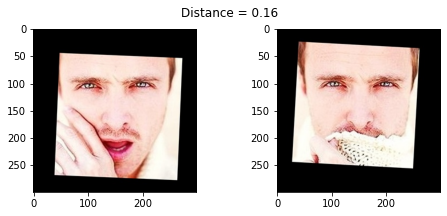

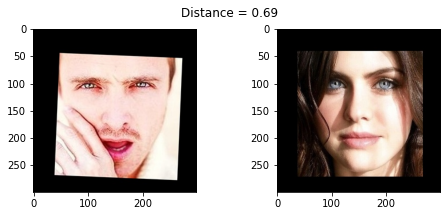

In [76]:
# Plot images and get distance between the pairs given below

import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

PINS\pins_Aaron Paul\Aaron Paul173_292.jpg
PINS\pins_Aaron Paul\Aaron Paul174_216.jpg
PINS\pins_Aaron Paul\Aaron Paul173_292.jpg
PINS\pins_alexandra daddario\alexandra daddario110.jpg


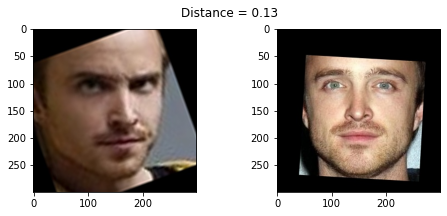

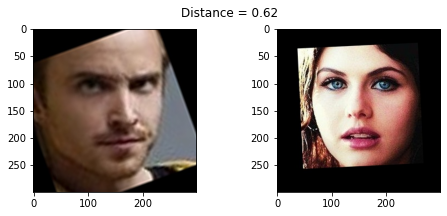

In [77]:
show_pair(30, 31)
show_pair(30, 100)

PINS\pins_Aaron Paul\Aaron Paul66_272.jpg
PINS\pins_Aaron Paul\Aaron Paul74_211.jpg
PINS\pins_Aaron Paul\Aaron Paul66_272.jpg
PINS\pins_alexandra daddario\alexandra daddario124.jpg


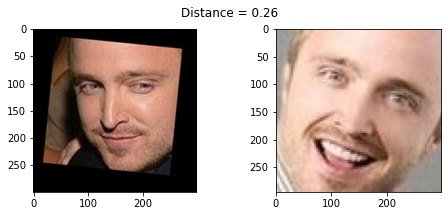

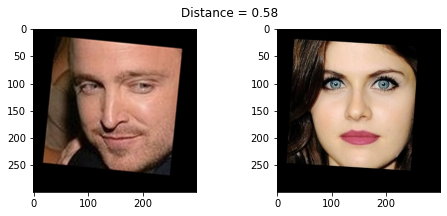

In [78]:
show_pair(70, 72)
show_pair(70, 115)

**Distance is lower for same personalities, and higher for different personalities. Model is able to successfully create the  embeddings, inwhich personalities features are captured well.**  

In [182]:
embeddings.shape

(10653, 2622)

    * embeddings are created for all the images. Each embedding has 2622 columns. Note 2622 is the vector size from 
    Flatten layer in the model.

In [91]:
# Create train and test sets

train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9469, 2622), (1184, 2622), (9469,), (1184,))

    * 9469 and 1184 images are allocated to training and testing sets respectively.

In [98]:
X_train, y_train 

(array([[ 0.03497701, -0.00105061, -0.01248934, ..., -0.0105309 ,
          0.00179322,  0.02439155],
        [ 0.02801891, -0.00112631, -0.0126575 , ..., -0.00904751,
         -0.00578403,  0.0212583 ],
        [ 0.01505303, -0.00503204, -0.00155374, ..., -0.00577054,
         -0.0059326 ,  0.01585888],
        ...,
        [ 0.00965872,  0.0037216 , -0.01345864, ..., -0.01433405,
          0.01899945,  0.03899155],
        [ 0.0023093 ,  0.00094764, -0.00544814, ..., -0.01600495,
          0.01053975,  0.0368325 ],
        [ 0.01772302,  0.01064051,  0.01995194, ..., -0.0261843 ,
          0.03288927,  0.0488265 ]]),
 array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
        'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29'))

    * X_train and X_test have the embeddings.
    * y_train and y_test have the image names(personality/identity names).

In [122]:
np.count_nonzero(np.unique(y_train)), np.count_nonzero(np.unique(y_test))

(99, 99)

    * 99 personalities are present in both training and test set. 

In [123]:
# Use LabelEncoder to Encode the targets
from sklearn.preprocessing import LabelEncoder

LBE = LabelEncoder()
y_train_lbe = LBE.fit_transform(y_train)
y_test_lbe = LBE.transform(y_test)

In [184]:
y_train, y_test, y_train_lbe, y_test_lbe

(array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
        'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29'),
 array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
        'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29'),
 array([ 0,  0,  0, ..., 98, 98, 98], dtype=int64),
 array([ 0,  0,  0, ..., 98, 98, 98], dtype=int64))

    * Labelencoder assigns a number to each personality.

In [127]:
#print the counts of each personlity in training sets
np.unique(y_train, return_counts=True), np.unique(y_train_lbe, return_counts=True) 

((array(['pins_Aaron Paul', 'pins_Alvaro Morte', 'pins_Amanda Crew',
         'pins_Amaury Nolasco', 'pins_Anna Gunn',
         'pins_Benedict Cumberbatch', 'pins_Betsy Brandt',
         'pins_Brenton Thwaites', 'pins_Brit Marling',
         'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan',
         'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt',
         'pins_Cobie Smulders', 'pins_Danielle Panabaker',
         'pins_Dave Franco', 'pins_Dominic Purcell', 'pins_Dwayne Johnson',
         'pins_Emilia Clarke', 'pins_Emily Bett Rickards',
         'pins_Emma Stone', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil',
         'pins_Jason Momoa', 'pins_Jeremy Renner', 'pins_Jesse Eisenberg',
         'pins_Jim Parsons', 'pins_Jon Bernthal', 'pins_Josh Radnor',
         'pins_Kit Harington', 'pins_Krysten Ritter',
         'pins_Kumail Nanjiani', 'pins_Maisie Williams',
         'pins_Mark Ruffalo', 'pins_Martin Starr', 'pins_Melissa benoit',
         'pins_Mike Col

In [128]:
#print the counts of each personlity in test sets
np.unique(y_test, return_counts=True), np.unique(y_test_lbe, return_counts=True)

((array(['pins_Aaron Paul', 'pins_Alvaro Morte', 'pins_Amanda Crew',
         'pins_Amaury Nolasco', 'pins_Anna Gunn',
         'pins_Benedict Cumberbatch', 'pins_Betsy Brandt',
         'pins_Brenton Thwaites', 'pins_Brit Marling',
         'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan',
         'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt',
         'pins_Cobie Smulders', 'pins_Danielle Panabaker',
         'pins_Dave Franco', 'pins_Dominic Purcell', 'pins_Dwayne Johnson',
         'pins_Emilia Clarke', 'pins_Emily Bett Rickards',
         'pins_Emma Stone', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil',
         'pins_Jason Momoa', 'pins_Jeremy Renner', 'pins_Jesse Eisenberg',
         'pins_Jim Parsons', 'pins_Jon Bernthal', 'pins_Josh Radnor',
         'pins_Kit Harington', 'pins_Krysten Ritter',
         'pins_Kumail Nanjiani', 'pins_Maisie Williams',
         'pins_Mark Ruffalo', 'pins_Martin Starr', 'pins_Melissa benoit',
         'pins_Mike Col

In [129]:
# Standarize features
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
X_train_sc = SC.fit_transform(X_train)
X_test_sc = SC.transform(X_test)

In [131]:
X_train_sc, X_train #print the scaled and original values

(array([[ 2.51796085, -0.05385381, -1.4743681 , ...,  0.38049371,
         -0.38413605,  0.85255707],
        [ 1.78866745, -0.06027246, -1.49043607, ...,  0.52058835,
         -1.1011883 ,  0.61100957],
        [ 0.42968667, -0.39147653, -0.42943292, ...,  0.83007198,
         -1.11524787,  0.1947596 ],
        ...,
        [-0.13570312,  0.35082761, -1.56698756, ...,  0.02131735,
          1.24412811,  1.97809471],
        [-0.90601165,  0.11559697, -0.80155629, ..., -0.13648573,
          0.44356754,  1.81165049],
        [ 0.70953324,  0.93754708,  1.6255097 , ..., -1.09784365,
          2.55855348,  2.73628687]]),
 array([[ 0.03497701, -0.00105061, -0.01248934, ..., -0.0105309 ,
          0.00179322,  0.02439155],
        [ 0.02801891, -0.00112631, -0.0126575 , ..., -0.00904751,
         -0.00578403,  0.0212583 ],
        [ 0.01505303, -0.00503204, -0.00155374, ..., -0.00577054,
         -0.0059326 ,  0.01585888],
        ...,
        [ 0.00965872,  0.0037216 , -0.01345864, ..., -

In [133]:
#Reduce feature dimensions using Principal Component Analysis

from sklearn.decomposition import PCA

pca1 = PCA(n_components=128) # Number of Principal components set to 128
X_train_pca = pca1.fit_transform(X_train_sc)
X_test_pca = pca1.transform(X_test_sc)

In [134]:
X_train_sc.shape, X_train_pca.shape, X_test_sc.shape, X_test_pca.shape

((9469, 2622), (9469, 128), (1184, 2622), (1184, 128))

    * PCA reduced the dimensions from 2622 to 128.

In [138]:
#Use SVM Classifier to predict the person in the given image
from sklearn.svm import SVC

svc = SVC()    
# Fit the classifier and print the score
svc.fit(X_train_pca, y_train_lbe)
SVC_TR = svc.score(X_train_pca, y_train_lbe)
SVC_TS = svc.score(X_test_pca, y_test_lbe)
print("Support Vector Classifier Training score : ", round(SVC_TR * 100, 2))
print("Support Vector Classifier Test score     : ", round(SVC_TS * 100, 2))

Support Vector Classifier Training score :  99.56
Support Vector Classifier Test score     :  95.86


    * Impressive Accuracy by SVC

PINS\pins_alexandra daddario\alexandra daddario101.jpg


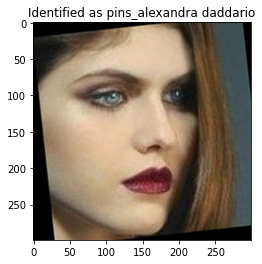

In [185]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

# Take 10th image from test set and plot the image
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())

#Report to which person(folder name in dataset) the image belongs to
example_prediction = svc.predict([X_test_pca[example_idx]])
example_identity = LBE.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

**Model has correctly predicted Alexandra Daddario's image**

### Custom model built using VGG Face pre-trained model is able to successfully recognize the personalities. 